## Final Project Submission

Please fill out:
* Student name: Rachel Beery
* Student pace: Full time
* Scheduled project review date/time: 9/21/2020 5:00 P.M.
* Instructor name: James
* Blog post URL: www.


# Module 2 Final Project: King County Housing Authority 

**Objective:** In this project we will be finding the best model for interpretability so that our non-technical audience can understand the findings of our modeling. 

**Approach:** The OSEUMiN data science workflow is utilized to effectively create a model to find what factors can result in the most profitable house.

**Data:** The data used for this project was records of houses sold in King County Washington. The columns of data provided include:

* **id** - unique identifier for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zip code** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

**Audience:** Non-technical audience of homeowners within King County, Washington who are interested to know what they can do to improve their home to maximize the selling price of their homes.

Questions we will be answering in this notebook:

1. What outlier removal method is the most effective?

2. What effect does outliers have on our outcomes and overall data?

3. How will multicollinearity affect what feature yields the highest selling price?

4. What features of a house yield make the house sell at a higher price?

# Importing Packages & Our Data

In [1]:
#We begin by importing all the packages we will need to read and clean the datasets, analyze the data, and finally make visualizations 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import plotly.express as px
import math
import scipy.stats as stats
import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
house_data = pd.read_csv(r"kc_house_data.csv")
house_data.head()

id        date      price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014 221900.000  ... -122.257           1340        5650
1  6414100192   12/9/2014 538000.000  ... -122.319           1690        7639
2  5631500400   2/25/2015 180000.000  ... -122.233           2720        8062
3  2487200875   12/9/2014 604000.000  ... -122.393           1360        5000
4  1954400510   2/18/2015 510000.000  ... -122.045           1800        7503

[5 rows x 21 columns]

In [4]:
# How many houses are in our dataset
house_data.shape

(21597, 21)

In [5]:
# Looking at our columns and seeing what data types they are
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Scrub

First I want to drop the columns/features that the home owner cannot change about their home. This will help in focusing on exploring and cleaning the data that I am interested in.

In [6]:
house_data = house_data.drop(columns=['id', 'waterfront', 'view', 'zipcode', 
                                      'lat', 'long', 'sqft_lot', 'yr_built', 'sqft_lot15', 
                                        'sqft_living15'])

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_renovated     17755 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1.8+ MB


In [8]:
# Changing dtypes that we know are numbers
house_data.price.astype('int64')

0         221900
1         538000
2         180000
3         604000
4         510000
5        1230000
6         257500
7         291850
8         229500
9         323000
10        662500
11        468000
12        310000
13        400000
14        530000
15        650000
16        395000
17        485000
18        189000
19        230000
20        385000
21       2000000
22        285000
23        252700
24        329000
25        233000
26        937000
27        667000
28        438000
29        719000
30        580500
31        280000
32        687500
33        535000
34        322500
35        696000
36        550000
37        640000
38        240000
39        605000
40        625000
41        775000
42        861990
43        685000
44        309000
45        488000
46        210490
47        785000
48        450000
49       1350000
50        228000
51        345000
52        600000
53        585000
54        920000
55        885000
56        292500
57        301000
58        9510

In [9]:
house_data.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [10]:
# Looking at all the object columns and seeing the unique values in each
objects = house_data.select_dtypes(include='object')
house_data.nunique()

date              372
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
floors              6
condition           5
grade              11
sqft_above        942
sqft_basement     304
yr_renovated       70
dtype: int64

In [11]:
# Finding out where null values are in DF
nulls = house_data.isna().sum()
only_nulls = nulls[nulls>0]/len(house_data)
only_nulls.to_frame('Percent Null').style.background_gradient(cmap='Reds')
# Yr_renovated is the only one

In [12]:
null_cols = list(only_nulls.index)
null_cols

['yr_renovated']

In [13]:
house_data[null_cols].mode()

yr_renovated
0         0.000

In [14]:
house_data[null_cols].nunique()

yr_renovated    70
dtype: int64

In [15]:
house_data.isna().sum(axis=1).value_counts()

0    17755
1     3842
dtype: int64

In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


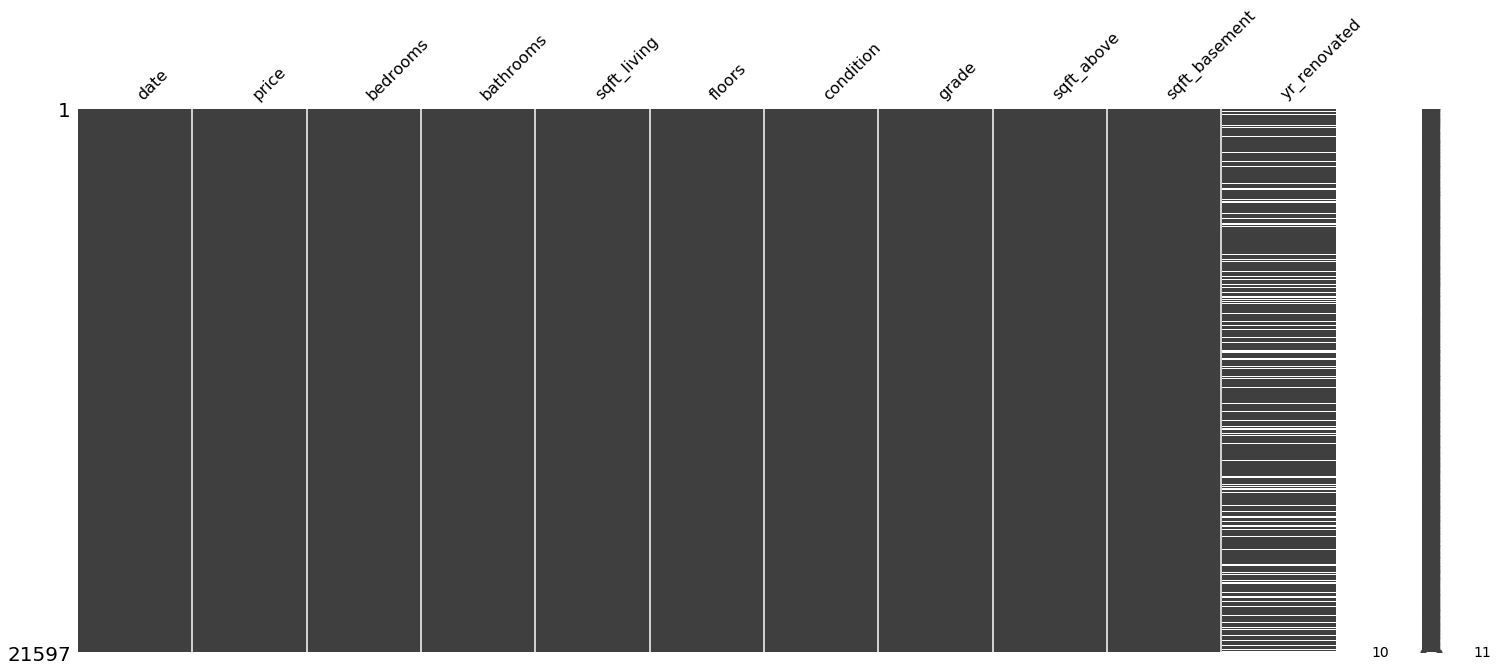

In [17]:
# Seeing if there is a pattern in specific houses that having nulls
import missingno as ms
ms.matrix(house_data)

In [18]:
### cat_cols = house_data.select_dt

In [19]:
### num_cols = house_data.select_dtypes('number').columns
### num_cols

In [20]:
# What columns have null values
house_data.isna().sum()
# We still have nulls in waterfront, view, and sqft_basement
# Going to these sections in the notebook to fix these columns

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3842
dtype: int64

In [21]:
# Fix sqft of basement first
house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
850.0        72
940.0        71
910.0        71
770.0        71
440.0        69
1200.0       69
880.0        69
290.0        69
520.0        68
350.0        68
920.0        66
630.0        66
960.0        65
730.0        65
430.0        64
740.0        64
1010.0       63
640.0        63
760.0        63
560.0        62
820.0        62
280.0        62
340.0        62
950.0        62
570.0        62
460.0        61
790.0        61
1060.0       58
310.0        58
980.0        57
830.0        56
810.0        55
1040.0  

In [22]:
# Fixing the '?'
house_data['sqft_basement'].replace('?', np.nan, inplace = True) 
# Changing the dtype to float instead of string
house_data['sqft_basement'] = house_data['sqft_basement'].astype('float')

In [23]:
house_data['sqft_basement'].replace('?', '0')

0          0.000
1        400.000
2          0.000
3        910.000
4          0.000
5       1530.000
6            nan
7          0.000
8        730.000
9          0.000
10      1700.000
11       300.000
12         0.000
13         0.000
14         0.000
15       970.000
16         0.000
17         0.000
18           nan
19         0.000
20       760.000
21       720.000
22         0.000
23         0.000
24         0.000
25         0.000
26       700.000
27         0.000
28       730.000
29         0.000
30         0.000
31         0.000
32       820.000
33         0.000
34       780.000
35       790.000
36       730.000
37         0.000
38       330.000
39         0.000
40         0.000
41      1620.000
42           nan
43         0.000
44       360.000
45         0.000
46         0.000
47         0.000
48         0.000
49       588.000
50         0.000
51      1510.000
52       410.000
53       990.000
54       600.000
55         0.000
56         0.000
57         0.000
58         0.0

In [24]:
house_data['sqft_basement'].nunique()

303

In [25]:
# Nulls will be changed to the mode of 0.0 for basement sqft 
house_data['sqft_basement'].mode()
house_data['sqft_basement'].fillna(0.0, axis = 0, inplace=True)

In [26]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_renovated     17755 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.8+ MB


In [27]:
# Changing 'sqft_basement' to int64
house_data['sqft_basement'].astype('int64')

0           0
1         400
2           0
3         910
4           0
5        1530
6           0
7           0
8         730
9           0
10       1700
11        300
12          0
13          0
14          0
15        970
16          0
17          0
18          0
19          0
20        760
21        720
22          0
23          0
24          0
25          0
26        700
27          0
28        730
29          0
30          0
31          0
32        820
33          0
34        780
35        790
36        730
37          0
38        330
39          0
40          0
41       1620
42          0
43          0
44        360
45          0
46          0
47          0
48          0
49        588
50          0
51       1510
52        410
53        990
54        600
55          0
56          0
57          0
58          0
59          0
60        560
61          0
62          0
63          0
64        550
65       1000
66          0
67          0
68          0
69       1600
70       1700
71    

In [28]:
### Data type is an object and needs to be changed to int64
house_data['date'].value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/28/2015     121
4/22/2015     121
7/9/2014      121
4/14/2015     121
6/24/2014     119
4/21/2015     119
10/28/2014    117
8/26/2014     117
5/20/2014     116
7/14/2014     116
7/1/2014      115
8/20/2014     114
4/29/2015     113
6/17/2014     113
4/8/2015      112
7/29/2014     112
7/16/2014     111
5/28/2014     111
4/23/2015     110
8/25/2014     109
8/5/2014      109
3/27/2015     109
8/11/2014     107
7/23/2014     107
6/20/2014     107
7/22/2014     105
3/26/2015     105
6/3/2014      104
5/27/2014     104
9/23/2014     103
8/22/2014     103
4/24/2015     103
4/2/2015      103
7/25/2014     102
4/7/2015      102
7/15/2014     102
5/4/2015      102
8/27/2014     102
3/24/2015     101
6/19/2014     101
11/13/2014    100
3/4/2015      100
8/12/2014     100
6/4/2014      100
7/18/2014     100
6/18/2014      99
9/24/2014      99
6/10/2014      98
2/24/2015      98
6/16/2014 

In [29]:
# Changing the date column into a datetime
house_data['date'] = pd.to_datetime(house_data['date'])
# Making a new column for year
house_data['year'] = house_data['date'].dt.year
# Making a new column for month
house_data['month'] = house_data['date'].dt.month 
# Making a new column for day
house_data['day'] = house_data['date'].dt.dayofweek

In [30]:
house_data = house_data.drop(['date'], axis = 1)

In [31]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_renovated     17755 non-null float64
year             21597 non-null int64
month            21597 non-null int64
day              21597 non-null int64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


In [32]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_renovated     17755 non-null float64
year             21597 non-null int64
month            21597 non-null int64
day              21597 non-null int64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


In [33]:
house_data = house_data.drop(columns=['year', 'day'], axis = 1)
house_data.head()

price  bedrooms  bathrooms  ...  sqft_basement  yr_renovated  month
0 221900.000         3      1.000  ...          0.000         0.000     10
1 538000.000         3      2.250  ...        400.000      1991.000     12
2 180000.000         2      1.000  ...          0.000           nan      2
3 604000.000         4      3.000  ...        910.000         0.000     12
4 510000.000         3      2.000  ...          0.000         0.000      2

[5 rows x 11 columns]

In [34]:
# Removing null values and changing the data type to integer
house_data['yr_renovated'].mode()
house_data['yr_renovated'].fillna(0.0, axis = 0, inplace = True)
house_data['yr_renovated'] = house_data['yr_renovated'].astype('int')
house_data['yr_renovated'].value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
2005       29
2000       29
2004       22
1990       22
2009       21
2006       20
1989       20
2002       17
1998       16
1984       16
1991       16
1999       15
2008       15
2010       15
2001       15
1983       15
1986       14
1985       14
1987       14
2015       14
1994       14
1992       13
1995       12
1993       12
1997       12
1996       11
1988       11
1970        9
2011        9
1980        8
2012        8
1982        8
1979        7
1977        7
1968        7
1975        5
1964        5
1963        4
1969        4
1981        4
1965        4
1973        4
1955        3
1956        3
1972        3
1978        3
1960        3
1958        3
1945        3
1962        2
1967        2
1957        2
1974        2
1940        2
1948        1
1959        1
1934        1
1971        1
1954        1
1950        1
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, 

In [35]:
# There are many houses that dont have renovation
# Will make these Booleans with this function below

for i in house_data['yr_renovated']:
    if i > 0:
        house_data['yr_renovated'].replace(i, 1, inplace = True)

# Change column name
house_data['was_renovated'] = house_data['yr_renovated']
house_data.drop(['yr_renovated'], axis = 1, inplace = True)

print(house_data['was_renovated'].value_counts())
house_data.head()

0    20853
1      744
Name: was_renovated, dtype: int64


price  bedrooms  bathrooms  ...  sqft_basement  month  was_renovated
0 221900.000         3      1.000  ...          0.000     10              0
1 538000.000         3      2.250  ...        400.000     12              1
2 180000.000         2      1.000  ...          0.000      2              0
3 604000.000         4      3.000  ...        910.000     12              0
4 510000.000         3      2.000  ...          0.000      2              0

[5 rows x 11 columns]

In [36]:
# Is there anymore we need to fix before outlier removal?
house_data.head()
house_data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
month            0
was_renovated    0
dtype: int64

In [37]:
house_data.isna().sum()
# Yay, there are no more null values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
month            0
was_renovated    0
dtype: int64

In [38]:
house_data.month.value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

In [39]:
# Making seasons to see what time of year might have the highest selling points
def seasons(x):
    if x > 0 and x < 4:
        season = 1
    elif x > 3 and x < 7:
        season = 2
    elif x > 6 and x < 10:
        season = 3
    else:
        season = 4       
    return season

In [40]:
house_data['seasons'] = house_data['month'].map(seasons)

In [41]:
house_data.seasons.value_counts()
# The best = Season 2
# The worst = Season 1

2    6821
3    5921
4    4755
1    4100
Name: seasons, dtype: int64

In [42]:
house_data['has_basement'] = house_data['sqft_basement'].map(lambda x: x!=0 )

In [43]:
house_data['has_basement'] = house_data['has_basement'].astype('int64')

In [44]:
house_data.has_basement.value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

# Exploring

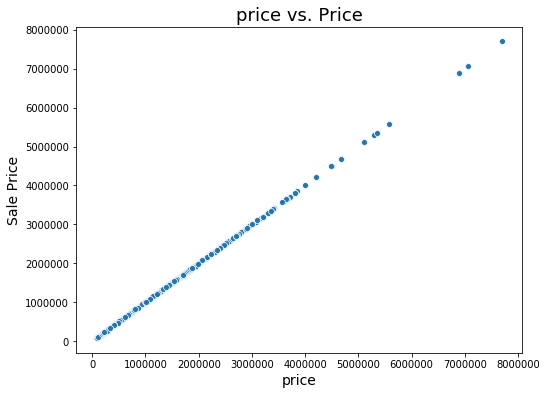

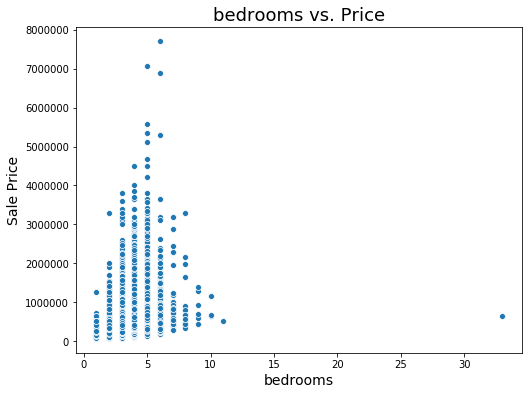

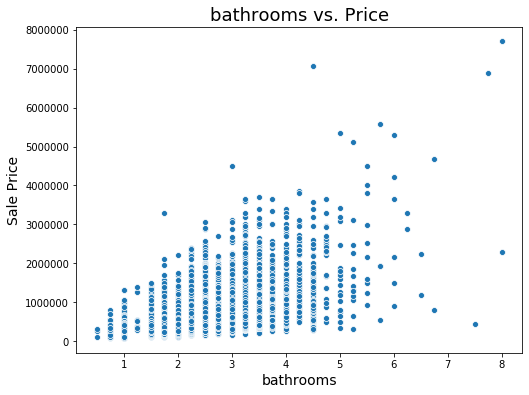

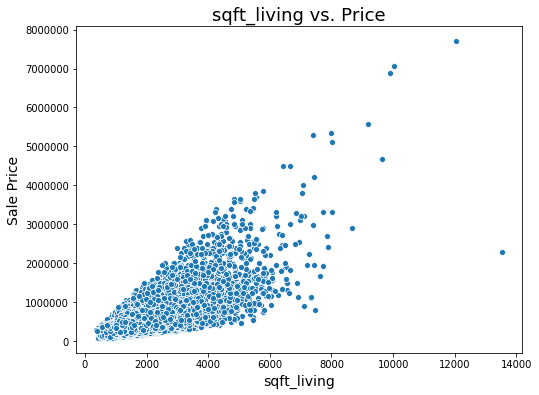

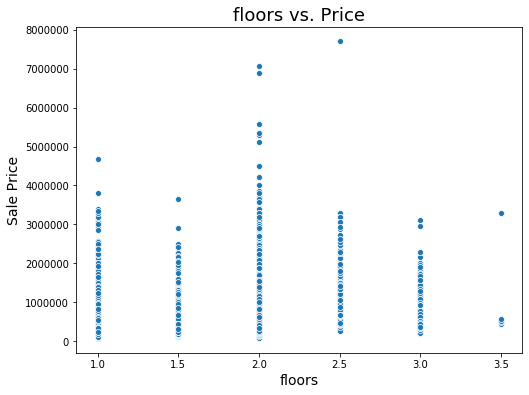

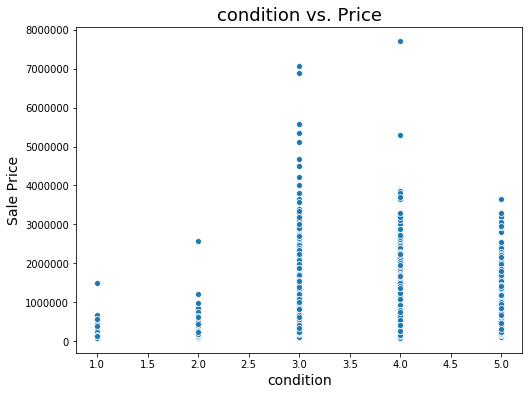

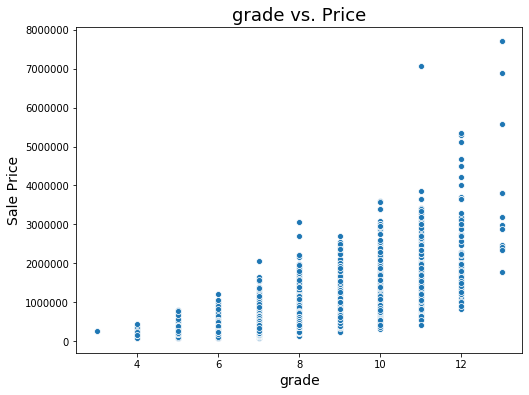

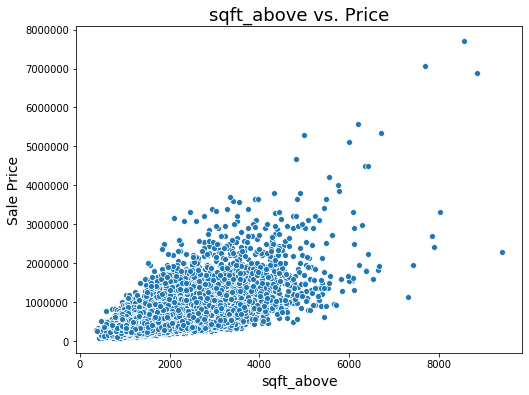

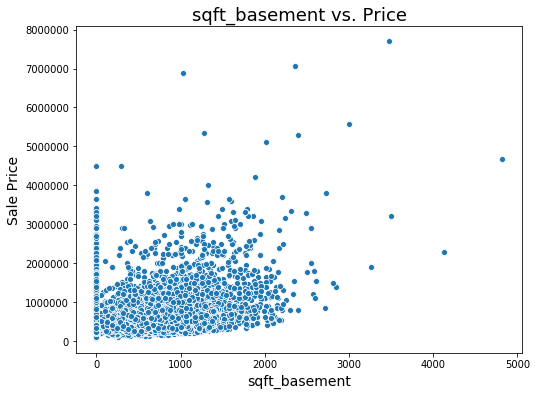

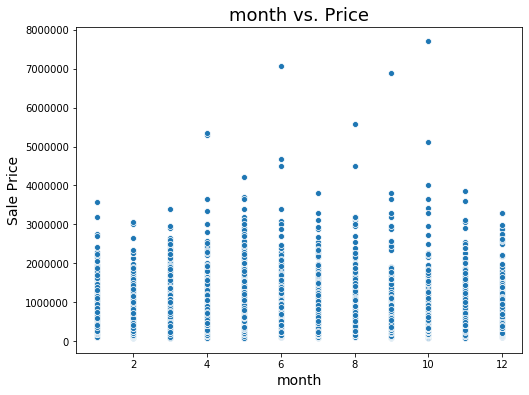

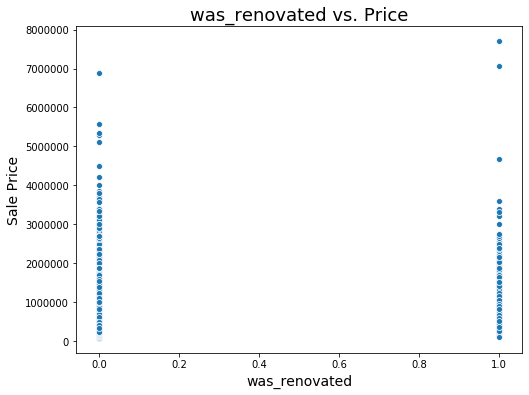

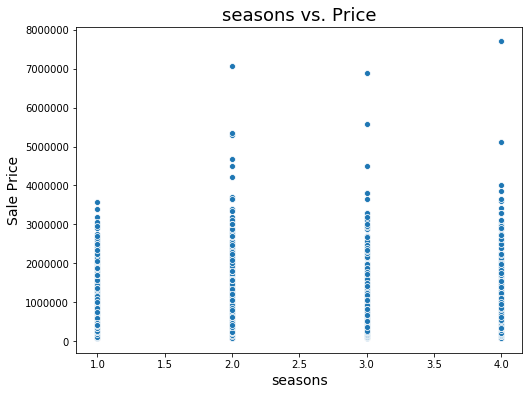

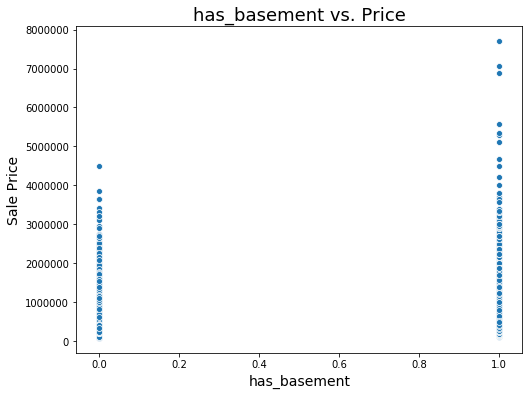

In [45]:
# A good method to understand the spread of each variable is through plotting

# Creating a function to make scatter plots
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = house_data[col], y = house_data['price'])
    ax.set_title('{} vs. Price'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Sale Price', fontsize = 14);

for col in house_data:

    scatterplot(col)

In [46]:
# Defining the features that might work better as categories
house_data['condition'] = house_data['condition'].astype('category')
house_data['seasons'] = house_data['seasons'].astype('category')
house_data['month'] = house_data['month'].astype('category')

In [47]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null category
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
month            21597 non-null category
was_renovated    21597 non-null int32
seasons          21597 non-null category
has_basement     21597 non-null int64
dtypes: category(3), float64(4), int32(1), int64(5)
memory usage: 1.6 MB


In [48]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='price', data=df, palette="colorblind")
        ax.set_title(f"{col} vs Price", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

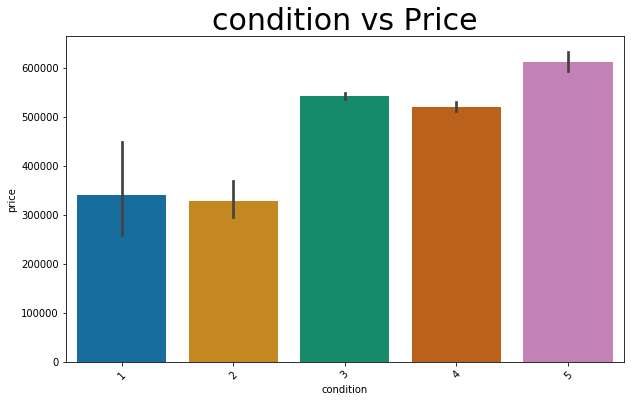

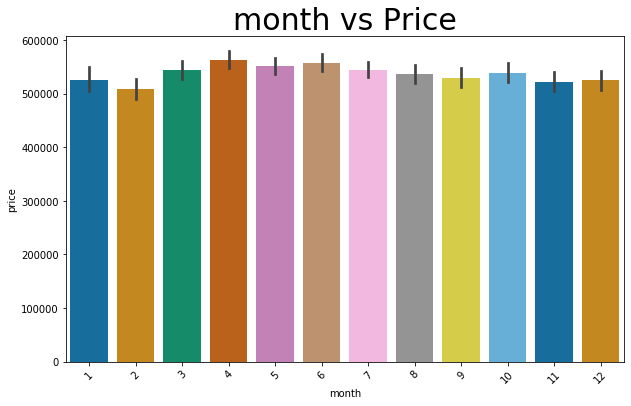

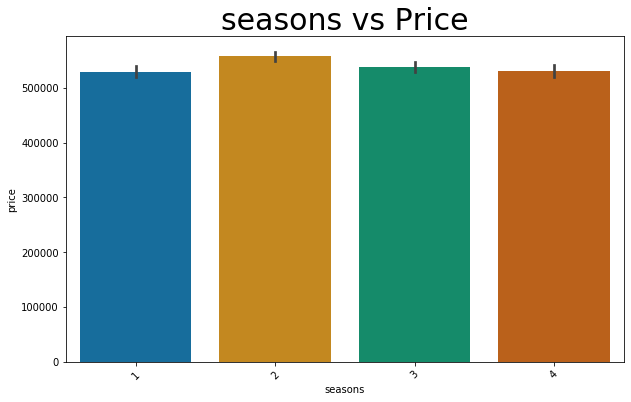

In [49]:
categorical_plots(house_data)

### Multicolinearity

In [50]:
# We will be dropping zipcode, lat, and long from this model as they have to do with location
# which the homeowner cannot change
df1 = house_data.copy()
df1.head()

price  bedrooms  bathrooms  ...  was_renovated  seasons has_basement
0 221900.000         3      1.000  ...              0        4            0
1 538000.000         3      2.250  ...              1        4            1
2 180000.000         2      1.000  ...              0        1            0
3 604000.000         4      3.000  ...              0        4            1
4 510000.000         3      2.000  ...              0        1            0

[5 rows x 13 columns]

In [51]:
# Checking for correlation in features before we go to remove outliers
corr1 = df1.iloc[:,2:] 
corr1.corr().abs().style.background_gradient(cmap='coolwarm')

(10, -0.5)

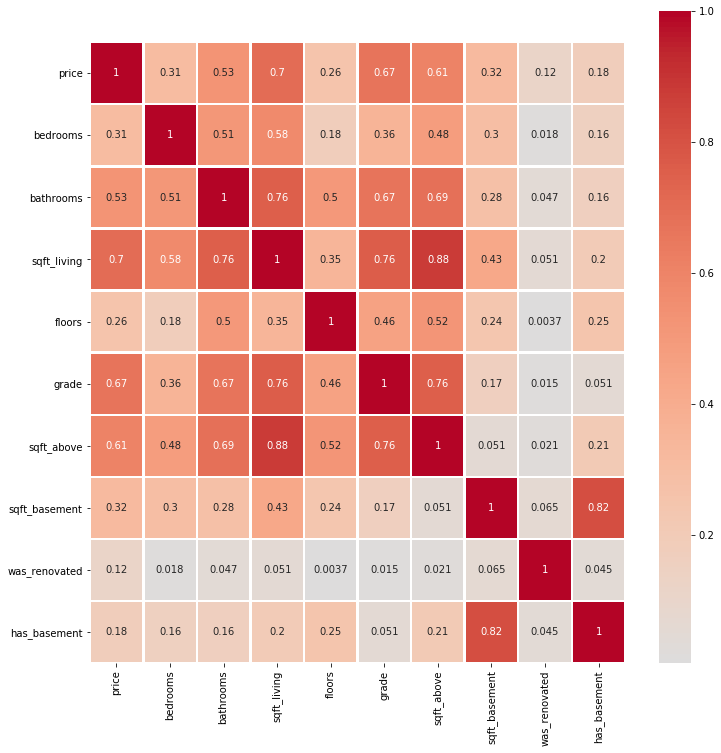

In [52]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df1.corr().abs(), center=0, annot=True, linewidths=1.5, cmap='coolwarm');
ax.set_ylim(len(df1.corr())-0, -0.5)

**To note:
There are some features that have high correlation that will need to be addressed later on**
    

### Modeling before Addressing Outliers

In [53]:
features = '+'.join(house_data.drop('price', axis = 1).columns)
formula = 'price ~' + features
model1 = smf.ols(formula, house_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     1204.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:43:56   Log-Likelihood:            -2.9821e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21572   BIC:                         5.967e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.754e+05   4.68e+04    -10.155      0.000   -5.67e+05   -3.84e+05
condition[T.2] -1.029e+05   4.83e+04     -2.130      0.033   -1.98e+05   -8214.921
condition[T.3] -1.524e+05   4.48e+04     -3.402      0.001    -2.4e+05   -6.46e+04
condition[T.4] -9.022e+04   4.48e+04     -2.012      0.044   -1.78e+05   -2349.213
condition[T.5] -4131.8500   4.51e+04     -0.092      0.927   -9.25e+04    8.43e+04
month[T.2]      2393.0331   1.03e+04      0.233      0.816   -1.77e+04    2.25e+04
month[T.3]      3.364e+04   9483.354      3.548      0.000    1.51e+04    5.22e+04
month[T.4]      2.591e+04   4631.689      5.594      0.000    1.68e+04     3.5e+04
month[T.5]     -2958.2444   4521.852     -0.654      0.513   -1.18e+04    5904.920
month[T.6]     -8993.8844   4665.540     -1.928      0.054   -1.81e+04     150.919
month[T.7]     -1520.3282   4723.306     -0.322      0.748   -1.08e+04    7737.701
month[T.8]      1182.0286   4913.304      0.241      0.810   -8448.411    1.08e+04
month[T.9]     -1829.1335   5054.242     -0.362      0.717   -1.17e+04    8077.555
month[T.10]     7375.3410   5104.195      1.445      0.148   -2629.258    1.74e+04
month[T.11]      544.5942   5580.225      0.098      0.922   -1.04e+04    1.15e+04
month[T.12]    -8365.1324   5503.453     -1.520      0.129   -1.92e+04    2422.042
seasons[T.2]    1.396e+04   6168.844      2.262      0.024    1864.460     2.6e+04
seasons[T.3]   -2167.4332   6231.538     -0.348      0.728   -1.44e+04       1e+04
seasons[T.4]    -445.1971   6341.503     -0.070      0.944   -1.29e+04     1.2e+04
bedrooms       -4.288e+04   2239.652    -19.145      0.000   -4.73e+04   -3.85e+04
bathrooms      -2.063e+04   3676.557     -5.611      0.000   -2.78e+04   -1.34e+04
sqft_living      192.5911     21.554      8.935      0.000     150.343     234.839
floors          3468.6264   4119.350      0.842      0.400   -4605.605    1.15e+04
grade           1.141e+05   2376.512     47.997      0.000    1.09e+05    1.19e+05
sqft_above         7.1856     21.479      0.335      0.738     -34.915      49.286
sqft_basement     40.7028     22.338      1.822      0.068      -3.082      84.488
was_renovated   1.883e+05   9025.447     20.867      0.000    1.71e+05    2.06e+05
has_basement    2.432e+04   6249.508      3.892      0.000    1.21e+04    3.66e+04
==============================================================================
Omnibus:                    16863.774   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1028945.417
Skew:                           3.263   Prob(JB):                         0.00
Kurtosis:                      36.179   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assum

This already tells us a lot about our initial data. To start we can see that our r-squared value is 0.767 which is very high. The 'Skew' value is 4.919, showing that the data has outliers that need to be addressed. The 'Kurtosis' value is 70.740, also showing heavy tails. Warnings also tell us that there may be issues with strong multicolinearity.

In [54]:
model1.params

Intercept        -475435.315
condition[T.2]   -102906.887
condition[T.3]   -152389.472
condition[T.4]    -90224.514
condition[T.5]     -4131.850
month[T.2]          2393.033
month[T.3]         33644.999
month[T.4]         25907.980
month[T.5]         -2958.244
month[T.6]         -8993.884
month[T.7]         -1520.328
month[T.8]          1182.029
month[T.9]         -1829.133
month[T.10]         7375.341
month[T.11]          544.594
month[T.12]        -8365.132
seasons[T.2]       13955.852
seasons[T.3]       -2167.433
seasons[T.4]        -445.197
bedrooms          -42877.119
bathrooms         -20629.125
sqft_living          192.591
floors              3468.626
grade             114065.179
sqft_above             7.186
sqft_basement         40.703
was_renovated     188330.512
has_basement       24324.042
dtype: float64

In [55]:
model1.resid.mean()

-4.120639900910157e-09

<Figure size 864x432 with 0 Axes>

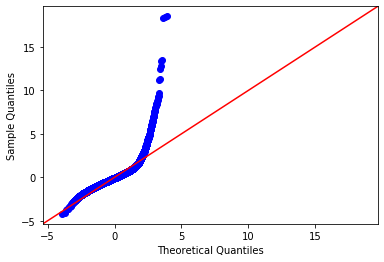

In [56]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

Wow, that's a really bad QQ plot result. Removing outliers will hopefully fix this issue

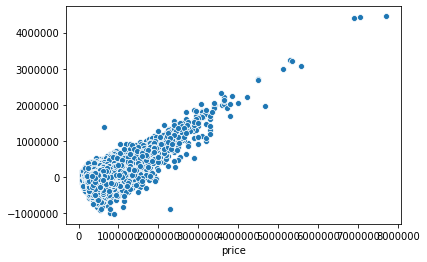

In [57]:
# I have a feeling that this scatterplot will show our data is heteroscadastic
# But for good measure will go ahead and make it
sns.scatterplot(house_data['price'], model1.resid, );

This visual clearly shows that we have some outliers in price. Now we will move on to remove them and see the difference.

In [58]:
# Function for running models and checking the data's changes
def model_fun(df, target='price', test_size=0.25):
    X = df.drop([target], axis=1)
    y = df[[target]]    
# Defining training test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=123)
# Defining df with the split data
    df_train = pd.concat([y_train, X_train], axis=1)
    df_test = pd.concat([y_test, X_test], axis=1) 
# Getting the categorical columns
    cat_cols = df_train.select_dtypes('category').columns
# Making the model summary
    features = '+'.join(df_train.drop(columns=target).columns)
# Looping through categoricals to make the formula
    for col in cat_cols:
        features = features.replace(col,f'C({col})')   
    formula = target + '~' + features
    model = smf.ols(formula, df_train).fit()
# QQ plot of the residuals for normality
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot of Residuals', fontsize=20)
# Homoscedasticity of Residuals
    ax=axes[1]
    ax.scatter(df_train['price'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set_title('Homoscedasticity of Residuals', fontsize=20)
    plt.show();

# Getting the predicted y values from the model
    y_predicted = model.predict(X_test)
    
# Plotting a scatterplot of the training vs original test data prices e
    plt.figure(figsize=(20,5))
    g = sns.scatterplot(range(len(y_predicted[:200])), y_predicted[:200], 
                        label='Predicted Prices')
    g = sns.scatterplot(range(len(y_test[:200])), y_test.price[:200], 
                        label='Actual Prices')

# Visual titles, labels, and legends of the plots
    plt.title('Comparison of predicted vs actual price', 
              fontdict={'fontsize':20})
    plt.xlabel('Values')
    plt.ylabel('Prices')
    plt.legend()
    plt.show();
    
# Generating the r2 for the test data to compare to the train data 
    r2_test = r2_score(y_test, y_predicted)
    print('Model test data R2 score:', r2_test)
# Displaying everything
    display(model.summary())
    return model

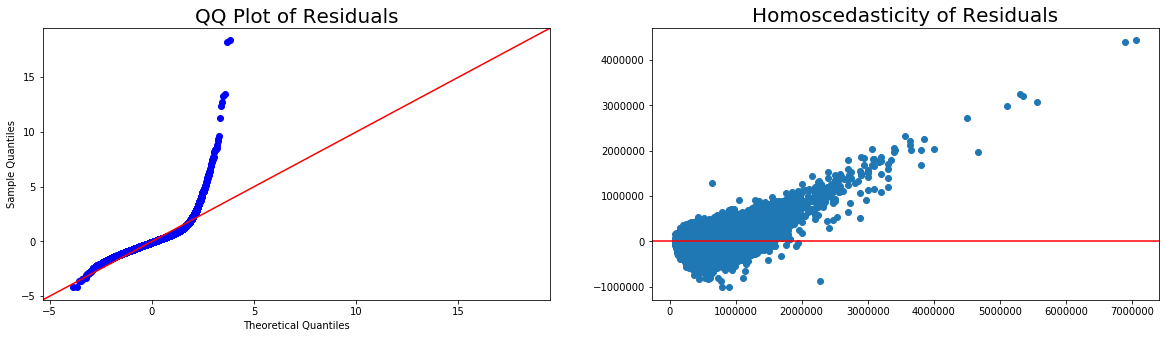

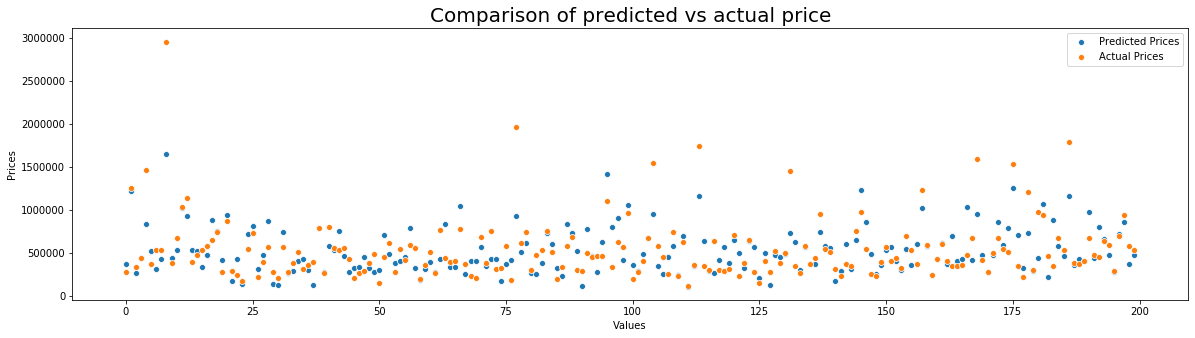

Model test data R2 score: 0.5770790862444544


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     896.1
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:43:58   Log-Likelihood:            -2.2373e+05
No. Observations:               16197   AIC:                         4.475e+05
Df Residuals:                   16172   BIC:                         4.477e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.809e+05    5.2e+04     -9.244      0.000   -5.83e+05   -3.79e+05
C(condition)[T.2] -9.647e+04   5.41e+04     -1.784      0.074   -2.02e+05    9529.230
C(condition)[T.3] -1.553e+05   4.95e+04     -3.137      0.002   -2.52e+05   -5.82e+04
C(condition)[T.4] -9.457e+04   4.96e+04     -1.909      0.056   -1.92e+05    2549.245
C(condition)[T.5] -8593.1666   4.99e+04     -0.172      0.863   -1.06e+05    8.92e+04
C(month)[T.2]      6194.8571   1.19e+04      0.520      0.603   -1.72e+04    2.96e+04
C(month)[T.3]      3.946e+04    1.1e+04      3.597      0.000     1.8e+04     6.1e+04
C(month)[T.4]       2.67e+04   5380.087      4.962      0.000    1.62e+04    3.72e+04
C(month)[T.5]     -6999.6725   5241.142     -1.336      0.182   -1.73e+04    3273.545
C(month)[T.6]     -1323.5986   5410.086     -0.245      0.807   -1.19e+04    9280.769
C(month)[T.7]     -1603.9640   5509.550     -0.291      0.771   -1.24e+04    9195.363
C(month)[T.8]      4088.0598   5705.122      0.717      0.474   -7094.610    1.53e+04
C(month)[T.9]      1464.6053   5846.285      0.251      0.802   -9994.761    1.29e+04
C(month)[T.10]     7728.3456   5918.610      1.306      0.192   -3872.785    1.93e+04
C(month)[T.11]     5872.8295   6438.270      0.912      0.362   -6746.892    1.85e+04
C(month)[T.12]    -8761.1441   6387.602     -1.372      0.170   -2.13e+04    3759.262
C(seasons)[T.2]    1.837e+04   7139.752      2.573      0.010    4378.512    3.24e+04
C(seasons)[T.3]    3948.7012   7214.371      0.547      0.584   -1.02e+04    1.81e+04
C(seasons)[T.4]    4840.0309   7338.691      0.660      0.510   -9544.617    1.92e+04
bedrooms          -3.968e+04   2569.043    -15.444      0.000   -4.47e+04   -3.46e+04
bathrooms          -2.03e+04   4269.588     -4.753      0.000   -2.87e+04   -1.19e+04
sqft_living         211.7052     27.399      7.727      0.000     158.000     265.410
floors             2499.9143   4742.812      0.527      0.598   -6796.523    1.18e+04
grade               1.13e+05   2754.694     41.037      0.000    1.08e+05    1.18e+05
sqft_above          -11.8573     27.298     -0.434      0.664     -65.364      41.649
sqft_basement        19.4120     28.213      0.688      0.491     -35.889      74.713
was_renovated      1.788e+05   1.02e+04     17.583      0.000    1.59e+05    1.99e+05
has_basement       2.835e+04   7197.998      3.938      0.000    1.42e+04    4.25e+04
==============================================================================
Omnibus:                    12594.343   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           729974.348
Skew:                           3.255   Prob(JB):                         0.00
Kurtosis:                      35.238   Cond. No.                     1.09e+16
======================

In [59]:
functionmodel1 = model_fun(house_data)

# Data Cleaning

### Outlier Removal

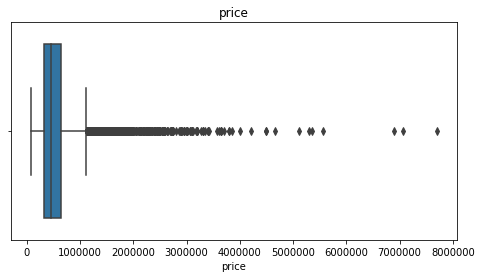

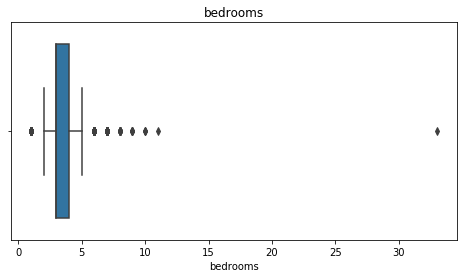

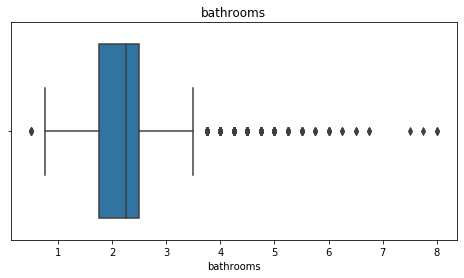

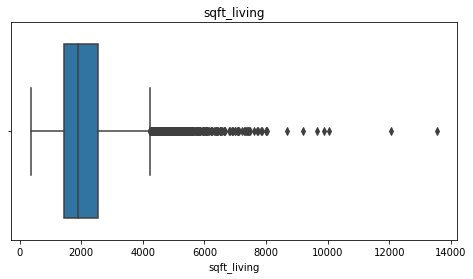

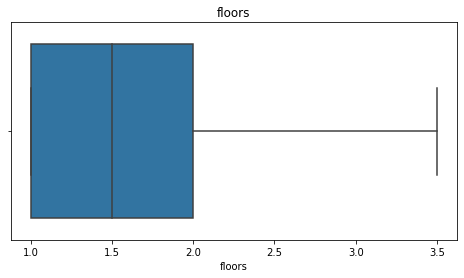

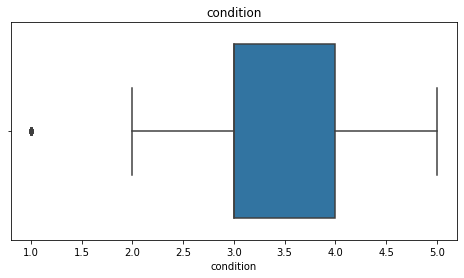

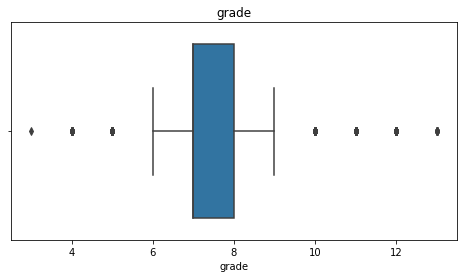

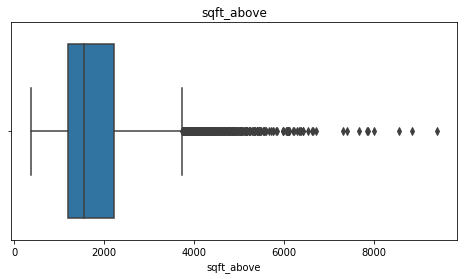

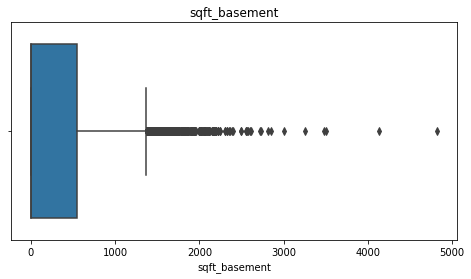

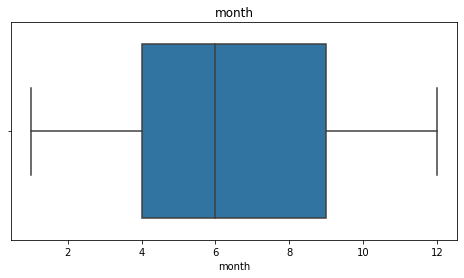

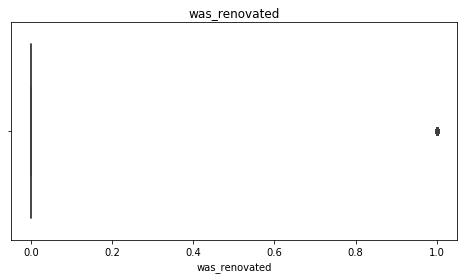

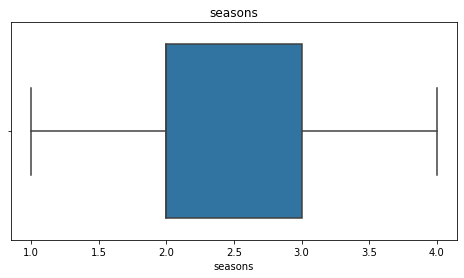

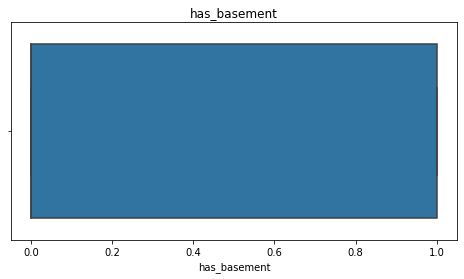

In [60]:
# Let's start by making some boxplots to see if there are obvious outliers
for column in house_data.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(house_data[column])
    plt.title('{}'.format(column))
    plt.show()

In [61]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [62]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [63]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(house_data.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(house_data, num_cols)

1158 outliers found in price
530 outliers found in bedrooms
561 outliers found in bathrooms
571 outliers found in sqft_living
0 outliers found in floors
1905 outliers found in grade
610 outliers found in sqft_above
560 outliers found in sqft_basement
744 outliers found in was_renovated
0 outliers found in has_basement


In [64]:
df2.head()

price  bedrooms  ...  was_renovated_outliers  has_basement_outliers
0 221900.000         3  ...                   False                  False
1 538000.000         3  ...                    True                  False
2 180000.000         2  ...                   False                  False
3 604000.000         4  ...                   False                  False
4 510000.000         3  ...                   False                  False

[5 rows x 23 columns]

In [65]:
df2.shape

(21597, 23)

In [66]:
# Dropping columns that are either continous or boolean (yes or no, has or doesn't have)
df2= df2.drop(columns=['was_renovated_outliers', 'has_basement_outliers', 'bedrooms_outliers',  
                        'bathrooms_outliers', 'grade_outliers'])

In [67]:
df2.head()

price  bedrooms  ...  sqft_above_outliers  sqft_basement_outliers
0 221900.000         3  ...                False                   False
1 538000.000         3  ...                False                   False
2 180000.000         2  ...                False                   False
3 604000.000         4  ...                False                   False
4 510000.000         3  ...                False                   False

[5 rows x 18 columns]

In [68]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['price_outliers',
 'sqft_living_outliers',
 'floors_outliers',
 'sqft_above_outliers',
 'sqft_basement_outliers']

In [69]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

(19780, 18)

In [70]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19780 entries, 0 to 21596
Data columns (total 13 columns):
price            19780 non-null float64
bedrooms         19780 non-null int64
bathrooms        19780 non-null float64
sqft_living      19780 non-null int64
floors           19780 non-null float64
condition        19780 non-null category
grade            19780 non-null int64
sqft_above       19780 non-null int64
sqft_basement    19780 non-null float64
month            19780 non-null category
was_renovated    19780 non-null int32
seasons          19780 non-null category
has_basement     19780 non-null int64
dtypes: category(3), float64(4), int32(1), int64(5)
memory usage: 1.6 MB


In [72]:
df2.describe()

price  bedrooms  ...  was_renovated  has_basement
count   19780.000 19780.000  ...      19780.000     19780.000
mean   466393.284     3.298  ...          0.030         0.364
std    199599.911     0.889  ...          0.172         0.481
min     78000.000     1.000  ...          0.000         0.000
25%    311000.000     3.000  ...          0.000         0.000
50%    430000.000     3.000  ...          0.000         0.000
75%    587812.500     4.000  ...          0.000         1.000
max   1120000.000    33.000  ...          1.000         1.000

[8 rows x 10 columns]

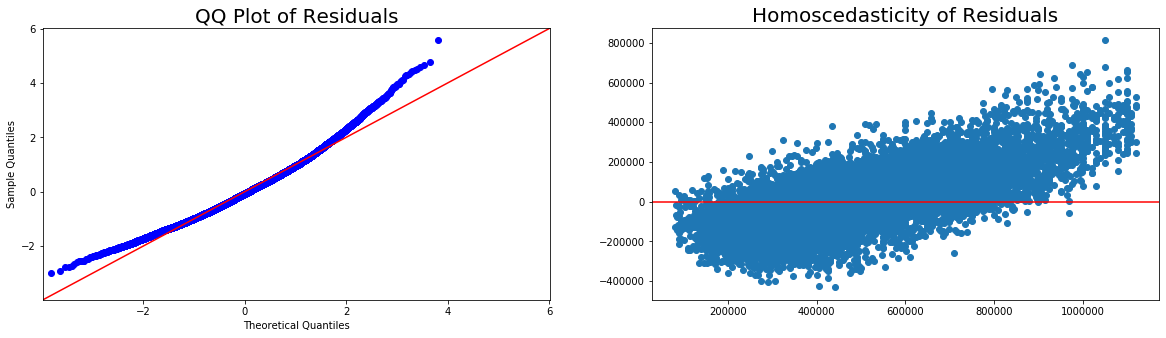

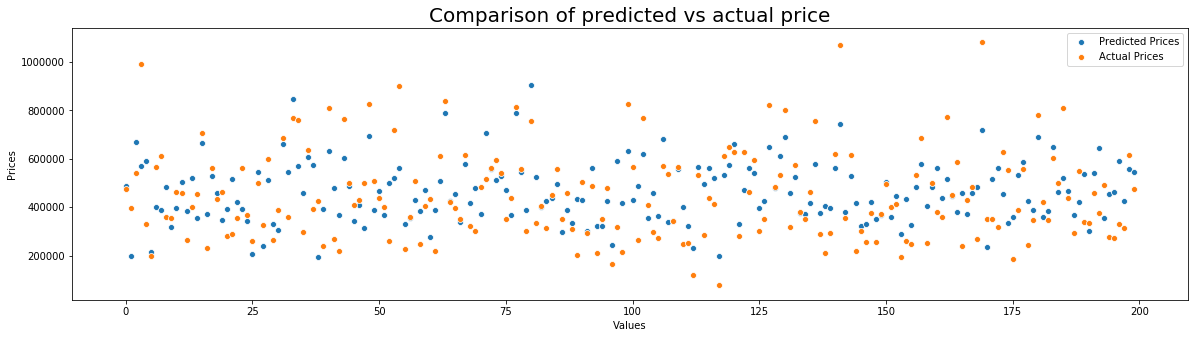

Model test data R2 score: 0.47295363908999255


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     545.0
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:44:01   Log-Likelihood:            -1.9739e+05
No. Observations:               14835   AIC:                         3.948e+05
Df Residuals:                   14810   BIC:                         3.950e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.904e+05    3.1e+04     -9.355      0.000   -3.51e+05    -2.3e+05
C(condition)[T.2] -7.088e+04   3.18e+04     -2.230      0.026   -1.33e+05   -8588.928
C(condition)[T.3] -6.265e+04   2.92e+04     -2.142      0.032    -1.2e+05   -5329.162
C(condition)[T.4] -2.442e+04   2.93e+04     -0.834      0.404   -8.18e+04     3.3e+04
C(condition)[T.5]  3.615e+04   2.95e+04      1.225      0.220   -2.17e+04     9.4e+04
C(month)[T.2]      -638.0186   7527.843     -0.085      0.932   -1.54e+04    1.41e+04
C(month)[T.3]      2.606e+04   7019.874      3.712      0.000    1.23e+04    3.98e+04
C(month)[T.4]      1.604e+04   3381.364      4.743      0.000    9411.366    2.27e+04
C(month)[T.5]       629.5212   3311.240      0.190      0.849   -5860.921    7119.963
C(month)[T.6]     -4565.5772   3421.818     -1.334      0.182   -1.13e+04    2141.611
C(month)[T.7]      -753.0537   3469.027     -0.217      0.828   -7552.778    6046.670
C(month)[T.8]       882.8749   3597.926      0.245      0.806   -6169.507    7935.257
C(month)[T.9]      2742.5275   3657.213      0.750      0.453   -4426.064    9911.119
C(month)[T.10]     4754.8334   3760.852      1.264      0.206   -2616.904    1.21e+04
C(month)[T.11]     1263.6266   4042.800      0.313      0.755   -6660.763    9188.016
C(month)[T.12]    -8205.8996   3981.678     -2.061      0.039    -1.6e+04    -401.317
C(seasons)[T.2]     1.21e+04   4555.314      2.657      0.008    3174.223     2.1e+04
C(seasons)[T.3]    2872.3487   4598.719      0.625      0.532   -6141.712    1.19e+04
C(seasons)[T.4]   -2187.4396   4675.909     -0.468      0.640   -1.14e+04    6977.922
bedrooms           -1.41e+04   1800.427     -7.832      0.000   -1.76e+04   -1.06e+04
bathrooms         -2.884e+04   2779.542    -10.375      0.000   -3.43e+04   -2.34e+04
sqft_living         151.9129     16.862      9.009      0.000     118.862     184.964
floors             2.858e+04   3059.188      9.341      0.000    2.26e+04    3.46e+04
grade              8.432e+04   1828.734     46.110      0.000    8.07e+04    8.79e+04
sqft_above          -45.3578     16.736     -2.710      0.007     -78.163     -12.553
sqft_basement       -47.9993     17.831     -2.692      0.007     -82.951     -13.048
was_renovated      1.044e+05   6873.936     15.184      0.000    9.09e+04    1.18e+05
has_basement        5.34e+04   5108.957     10.453      0.000    4.34e+04    6.34e+04
==============================================================================
Omnibus:                      870.282   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1099.739
Skew:                           0.572   Prob(JB):                    1.57e-239
Kurtosis:                       3.686   Cond. No.                     1.06e+16
======================

In [73]:
# Time to make a model to see the difference
functionmodel2 = model_fun(df2)

Notes: This is some improvement from our last model. We can see that the QQ plot is better distributed alone our line of fit. Homodescedasticisity is also better and fits the line better. We can still improve more with other transformations possibly.

Our R-squared value is very low though which means that we are not doing a good job of explaining what features influence the model.

In [74]:
df2.bedrooms.value_counts()

3     9506
4     5985
2     2734
5     1140
1      194
6      185
7       23
8        7
10       2
9        2
11       1
33       1
Name: bedrooms, dtype: int64

In [75]:
# Removing the obvious bedroom outliers here
df2 = df2[(df2['bedrooms']!=33)]

In [76]:
df2.bedrooms.value_counts()

3     9506
4     5985
2     2734
5     1140
1      194
6      185
7       23
8        7
10       2
9        2
11       1
Name: bedrooms, dtype: int64

In [77]:
df2.describe()

price  bedrooms  ...  was_renovated  has_basement
count   19779.000 19779.000  ...      19779.000     19779.000
mean   466384.507     3.296  ...          0.030         0.364
std    199601.140     0.864  ...          0.172         0.481
min     78000.000     1.000  ...          0.000         0.000
25%    311000.000     3.000  ...          0.000         0.000
50%    430000.000     3.000  ...          0.000         0.000
75%    587625.000     4.000  ...          0.000         1.000
max   1120000.000    11.000  ...          1.000         1.000

[8 rows x 10 columns]

In [78]:
# Removing the obvious bedroom outliers here
df2 = df2[(df2['bathrooms']!=5.75)]

In [79]:
# 1/4 bathroom is maybe a real thing
# Could round up and down

In [80]:
df2.describe()

price  bedrooms  ...  was_renovated  has_basement
count   19778.000 19778.000  ...      19778.000     19778.000
mean   466380.785     3.296  ...          0.030         0.364
std    199605.499     0.864  ...          0.172         0.481
min     78000.000     1.000  ...          0.000         0.000
25%    311000.000     3.000  ...          0.000         0.000
50%    430000.000     3.000  ...          0.000         0.000
75%    587687.500     4.000  ...          0.000         1.000
max   1120000.000    11.000  ...          1.000         1.000

[8 rows x 10 columns]

### Scaling

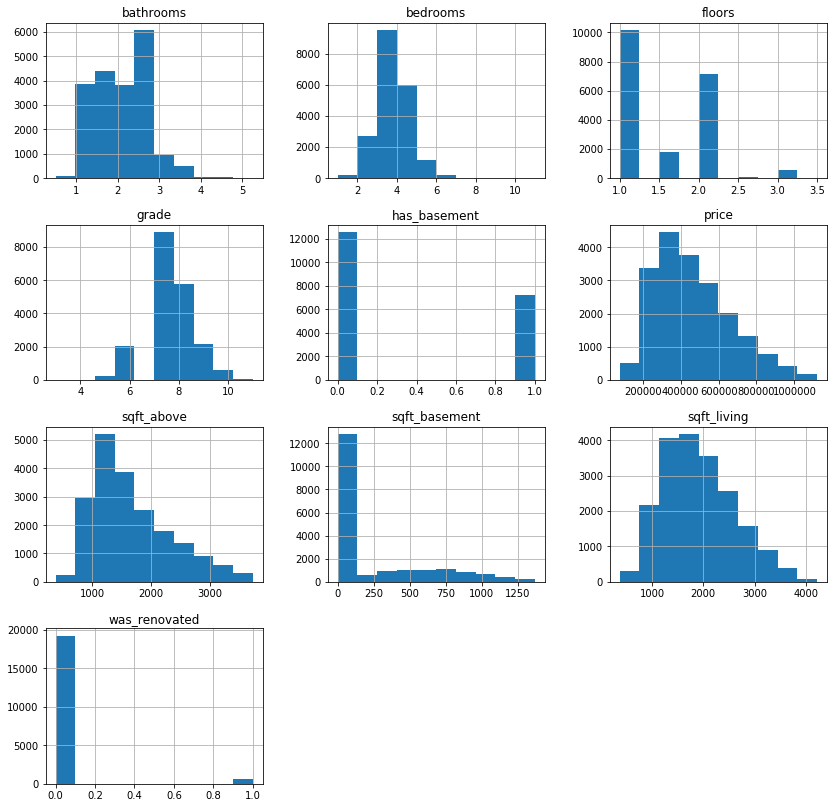

In [81]:
# There are some outliers and skewness still
# Scaling our data may improve our r2 and make our data more normal
df2.hist(figsize = (14,14));

In [82]:
cont = ['price', 'bathrooms', 'bedrooms', 'floors', 'grade', 
       'sqft_above', 'sqft_living']
df2cont = df2[cont]

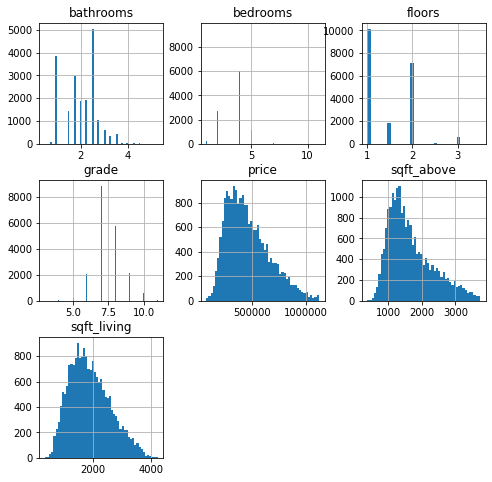

In [83]:
df2cont.hist(figsize  = [8, 8], bins='auto');

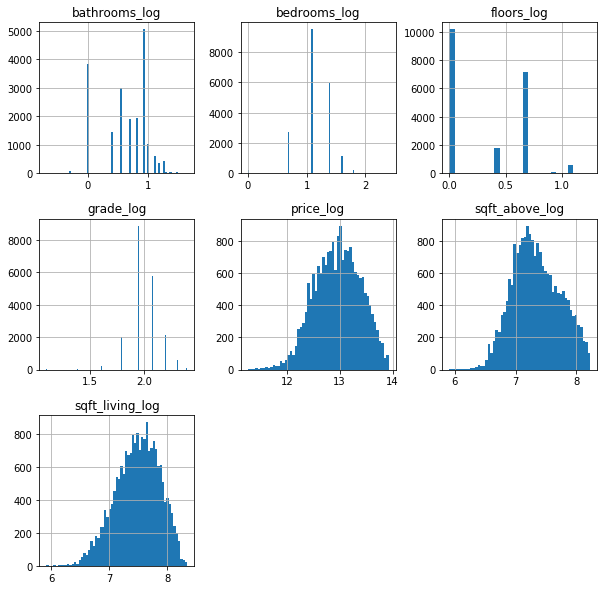

In [84]:
log_names = [f'{column}_log' for column in df2cont.columns]

df2log = np.log(df2cont)
df2log.columns = log_names
df2log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [85]:
features = '+'.join(df2.drop('price', axis = 1).columns)
formula = 'price ~' + features
model1 = smf.ols(formula, df2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     731.6
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:44:06   Log-Likelihood:            -2.6315e+05
No. Observations:               19778   AIC:                         5.263e+05
Df Residuals:                   19753   BIC:                         5.265e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.113e+05    2.9e+04    -10.740      0.000   -3.68e+05   -2.55e+05
condition[T.2] -6.068e+04   2.97e+04     -2.043      0.041   -1.19e+05   -2464.899
condition[T.3] -5.006e+04   2.76e+04     -1.815      0.070   -1.04e+05    4002.961
condition[T.4] -1.057e+04   2.76e+04     -0.383      0.702   -6.47e+04    4.35e+04
condition[T.5]  5.283e+04   2.78e+04      1.901      0.057   -1638.106    1.07e+05
month[T.2]       764.1142   6480.927      0.118      0.906   -1.19e+04    1.35e+04
month[T.3]      2.455e+04   5998.405      4.092      0.000    1.28e+04    3.63e+04
month[T.4]      2.012e+04   2926.155      6.876      0.000    1.44e+04    2.59e+04
month[T.5]     -1152.0700   2864.173     -0.402      0.688   -6766.089    4461.949
month[T.6]     -4867.1353   2954.624     -1.647      0.100   -1.07e+04     924.175
month[T.7]      1344.7364   2991.899      0.449      0.653   -4519.638    7209.111
month[T.8]        23.4139   3095.116      0.008      0.994   -6043.273    6090.101
month[T.9]      1300.2702   3186.763      0.408      0.683   -4946.054    7546.594
month[T.10]     4945.4866   3230.560      1.531      0.126   -1386.683    1.13e+04
month[T.11]     1200.4217   3512.443      0.342      0.733   -5684.262    8085.106
month[T.12]    -7327.0272   3477.364     -2.107      0.035   -1.41e+04    -511.101
seasons[T.2]     1.41e+04   3902.241      3.613      0.000    6451.734    2.17e+04
seasons[T.3]    2668.4205   3940.403      0.677      0.498   -5055.100    1.04e+04
seasons[T.4]   -1181.1188   4009.786     -0.295      0.768   -9040.636    6678.398
bedrooms       -1.324e+04   1544.273     -8.575      0.000   -1.63e+04   -1.02e+04
bathrooms      -2.737e+04   2411.851    -11.350      0.000   -3.21e+04   -2.26e+04
sqft_living      144.6820     14.715      9.832      0.000     115.839     173.525
floors          2.829e+04   2649.369     10.679      0.000    2.31e+04    3.35e+04
grade           8.473e+04   1587.957     53.359      0.000    8.16e+04    8.78e+04
sqft_above       -38.8174     14.623     -2.655      0.008     -67.480     -10.155
sqft_basement    -48.6858     15.563     -3.128      0.002     -79.191     -18.180
was_renovated   1.045e+05   6048.271     17.283      0.000    9.27e+04    1.16e+05
has_basement    5.672e+04   4429.191     12.806      0.000     4.8e+04    6.54e+04
==============================================================================
Omnibus:                     1117.750   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1397.745
Skew:                           0.563   Prob(JB):                    3.04e-304
Kurtosis:                       3.656   Cond. No.                     1.06e+16
==============================================================================

Warnings:
[1] Standard Errors assum

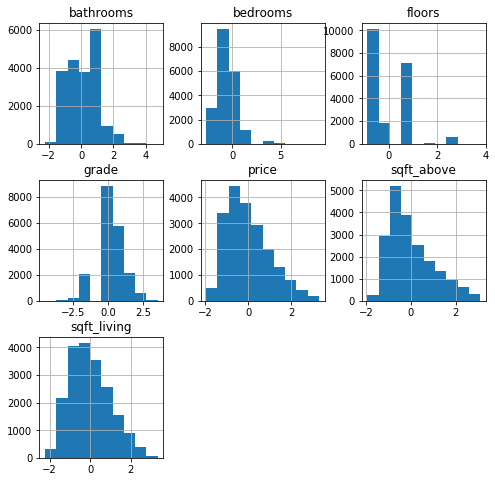

In [86]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

featuresdf2 = df2cont.apply(normalize)

featuresdf2.hist(figsize  = [8, 8]);

In [87]:
features = '+'.join(df2.drop('price', axis = 1).columns)
formula = 'price ~' + features
model1 = smf.ols(formula, df2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     731.6
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:44:07   Log-Likelihood:            -2.6315e+05
No. Observations:               19778   AIC:                         5.263e+05
Df Residuals:                   19753   BIC:                         5.265e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.113e+05    2.9e+04    -10.740      0.000   -3.68e+05   -2.55e+05
condition[T.2] -6.068e+04   2.97e+04     -2.043      0.041   -1.19e+05   -2464.899
condition[T.3] -5.006e+04   2.76e+04     -1.815      0.070   -1.04e+05    4002.961
condition[T.4] -1.057e+04   2.76e+04     -0.383      0.702   -6.47e+04    4.35e+04
condition[T.5]  5.283e+04   2.78e+04      1.901      0.057   -1638.106    1.07e+05
month[T.2]       764.1142   6480.927      0.118      0.906   -1.19e+04    1.35e+04
month[T.3]      2.455e+04   5998.405      4.092      0.000    1.28e+04    3.63e+04
month[T.4]      2.012e+04   2926.155      6.876      0.000    1.44e+04    2.59e+04
month[T.5]     -1152.0700   2864.173     -0.402      0.688   -6766.089    4461.949
month[T.6]     -4867.1353   2954.624     -1.647      0.100   -1.07e+04     924.175
month[T.7]      1344.7364   2991.899      0.449      0.653   -4519.638    7209.111
month[T.8]        23.4139   3095.116      0.008      0.994   -6043.273    6090.101
month[T.9]      1300.2702   3186.763      0.408      0.683   -4946.054    7546.594
month[T.10]     4945.4866   3230.560      1.531      0.126   -1386.683    1.13e+04
month[T.11]     1200.4217   3512.443      0.342      0.733   -5684.262    8085.106
month[T.12]    -7327.0272   3477.364     -2.107      0.035   -1.41e+04    -511.101
seasons[T.2]     1.41e+04   3902.241      3.613      0.000    6451.734    2.17e+04
seasons[T.3]    2668.4205   3940.403      0.677      0.498   -5055.100    1.04e+04
seasons[T.4]   -1181.1188   4009.786     -0.295      0.768   -9040.636    6678.398
bedrooms       -1.324e+04   1544.273     -8.575      0.000   -1.63e+04   -1.02e+04
bathrooms      -2.737e+04   2411.851    -11.350      0.000   -3.21e+04   -2.26e+04
sqft_living      144.6820     14.715      9.832      0.000     115.839     173.525
floors          2.829e+04   2649.369     10.679      0.000    2.31e+04    3.35e+04
grade           8.473e+04   1587.957     53.359      0.000    8.16e+04    8.78e+04
sqft_above       -38.8174     14.623     -2.655      0.008     -67.480     -10.155
sqft_basement    -48.6858     15.563     -3.128      0.002     -79.191     -18.180
was_renovated   1.045e+05   6048.271     17.283      0.000    9.27e+04    1.16e+05
has_basement    5.672e+04   4429.191     12.806      0.000     4.8e+04    6.54e+04
==============================================================================
Omnibus:                     1117.750   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1397.745
Skew:                           0.563   Prob(JB):                    3.04e-304
Kurtosis:                       3.656   Cond. No.                     1.06e+16
==============================================================================

Warnings:
[1] Standard Errors assum

In [88]:
df2.drop(columns=['sqft_basement'], inplace=True)

In [89]:
# Defining continuous and categorical variables
cont = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above']  
categorical = ['condition', 'grade', 'month', 'was_renovated', 'seasons', 'has_basement']

In [90]:
# Log transform and normalize
house_data_cont = house_data[cont]

# log features
log_names = [f'{column}_log' for column in house_data_cont.columns]

hdlog = np.log(house_data_cont)
hdlog.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

hd_log_norm = hdlog.apply(normalize)

In [91]:
hd_ohe = pd.get_dummies(house_data[categorical], drop_first=True)

In [92]:
preprocessed = pd.concat([hd_log_norm, hd_ohe], axis=1)
preprocessed.head()

price_log  bedrooms_log  bathrooms_log  ...  seasons_2  seasons_3  seasons_4
0     -1.402        -0.280         -1.727  ...          0          0          1
1      0.280        -0.280          0.340  ...          0          0          1
2     -1.799        -1.712         -1.727  ...          0          0          0
3      0.500         0.736          1.073  ...          0          0          1
4      0.178        -0.280          0.040  ...          0          0          0

[5 rows x 27 columns]

In [93]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [94]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\rache\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1353.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:44:07   Log-Likelihood:                -21003.
No. Observations:               21597   AIC:                         4.205e+04
Df Residuals:                   21573   BIC:                         4.225e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.2864      0.128    -25.728      0.000      -3.537      -3.036
bedrooms_log       -0.0774      0.006    -13.080      0.000      -0.089      -0.066
bathrooms_log      -0.0759      0.007    -10.263      0.000      -0.090      -0.061
sqft_living_log     0.3173      0.018     17.267      0.000       0.281       0.353
floors_log          0.0623      0.006     10.210      0.000       0.050       0.074
sqft_above_log      0.0577      0.018      3.157      0.002       0.022       0.093
grade               0.4147      0.006     67.731      0.000       0.403       0.427
was_renovated       0.4766      0.024     19.842      0.000       0.430       0.524
has_basement        0.2912      0.018     16.398      0.000       0.256       0.326
condition_2        -0.2878      0.129     -2.236      0.025      -0.540      -0.036
condition_3        -0.1424      0.119     -1.193      0.233      -0.376       0.092
condition_4         0.0363      0.119      0.304      0.761      -0.198       0.270
condition_5         0.3145      0.120      2.616      0.009       0.079       0.550
month_2             0.0154      0.027      0.562      0.574      -0.038       0.069
month_3             0.1092      0.025      4.322      0.000       0.060       0.159
month_4             0.0931      0.012      7.545      0.000       0.069       0.117
month_5            -0.0039      0.012     -0.326      0.744      -0.028       0.020
month_6            -0.0256      0.012     -2.063      0.039      -0.050      -0.001
month_7             0.0063      0.013      0.501      0.616      -0.018       0.031
month_8             0.0016      0.013      0.125      0.901      -0.024       0.027
month_9             0.0037      0.013      0.277      0.782      -0.023       0.030
month_10            0.0227      0.014      1.670      0.095      -0.004       0.049
month_11            0.0009      0.015      0.061      0.952      -0.028       0.030
month_12           -0.0210      0.015     -1.434      0.152      -0.050       0.008
seasons_2           0.0635      0.016      3.866      0.000       0.031       0.096
seasons_3           0.0117      0.017      0.702      0.482      -0.021       0.044
seasons_4           0.0026      0.017      0.153      0.878      -0.031       0.036
==============================================================================
Omnibus:                       62.980   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.062
Skew:                           0.116   Prob(JB):                     7.45e-15
Kurtosis:                       3.135   Cond. No.                     1.67e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

### Linearity, Normality, & Homoscedasticity

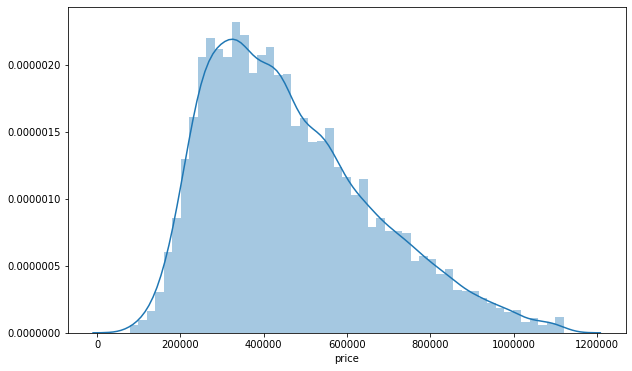

In [95]:
# Let's look at the target price first
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df2['price'], bins='auto')

# Adjusting the money ticks 
# fmt_money = '${x:,.0f}'

In [96]:
# To start I want to go ahead and limit the target: price column 
# to only have houses in the majority range $0-$1,000,000
df2 = df2[(df2['price']<=1000000)]

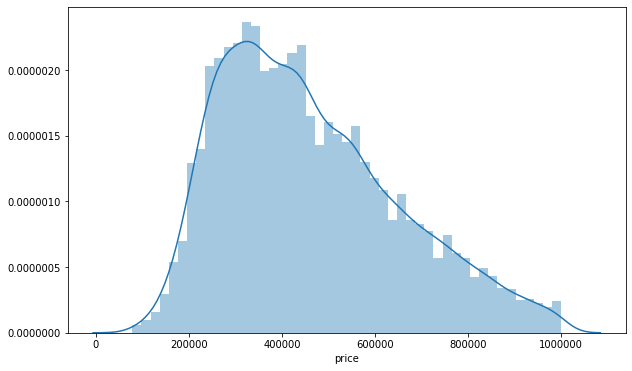

In [97]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df2['price'], bins='auto')

In [98]:
df2['price'].describe()
# Now our target is limited to 1,000,000 and under

count     19580.000
mean     460365.636
std      191363.837
min       78000.000
25%      310000.000
50%      427500.000
75%      580000.000
max     1000000.000
Name: price, dtype: float64

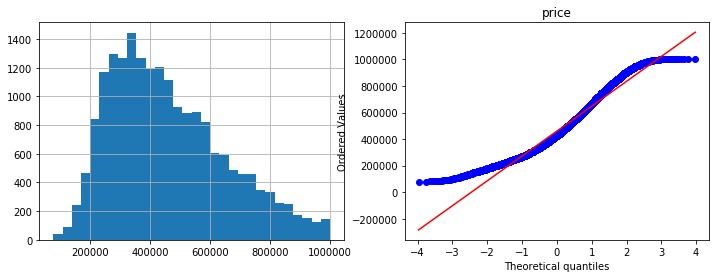

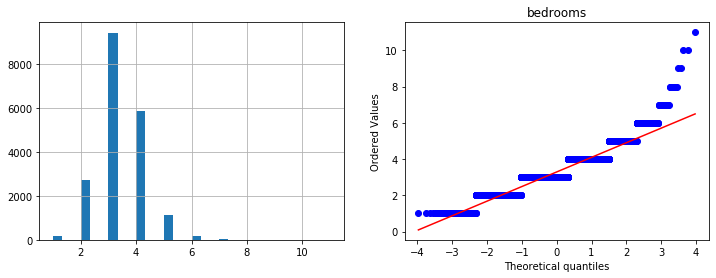

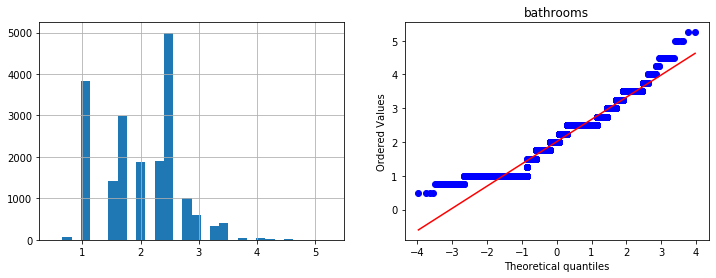

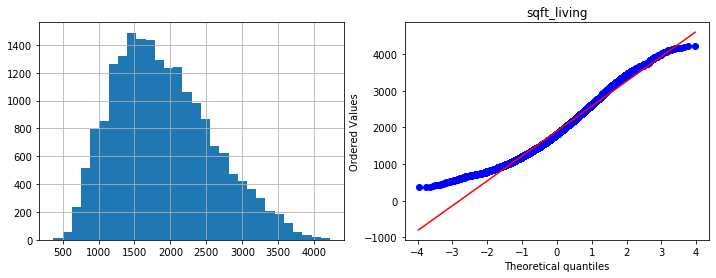

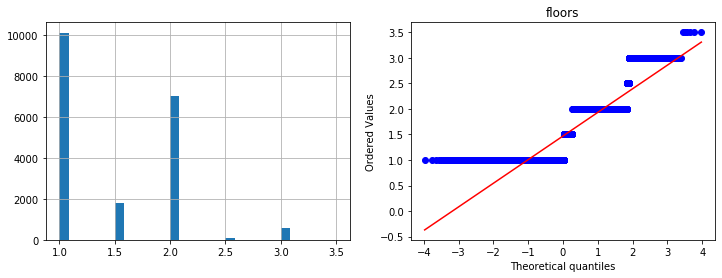

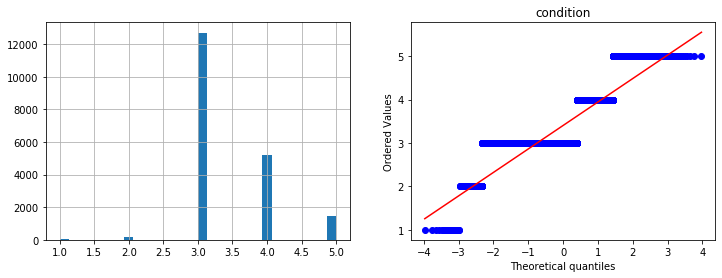

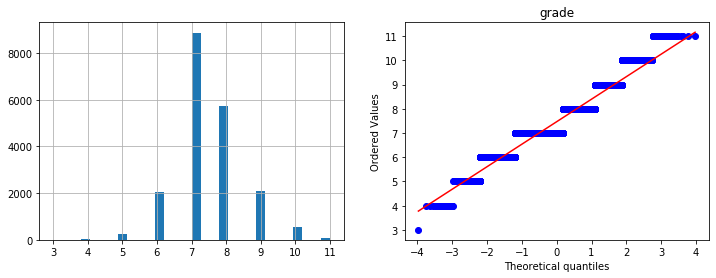

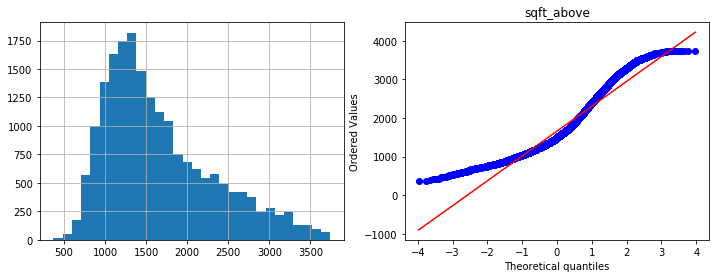

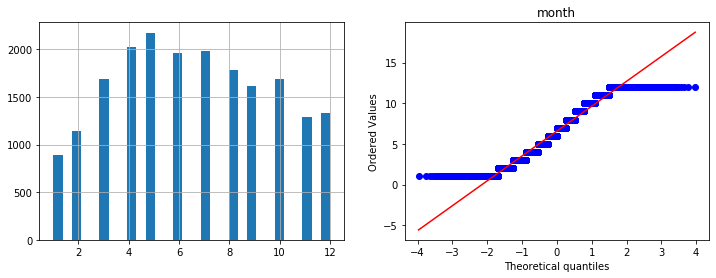

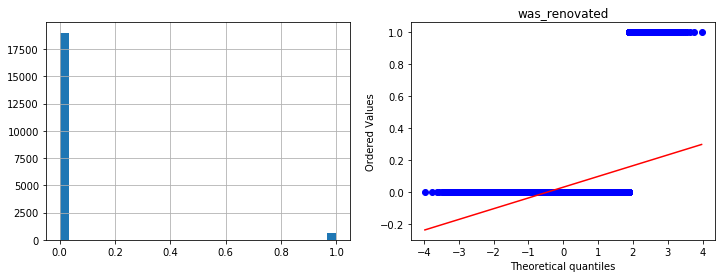

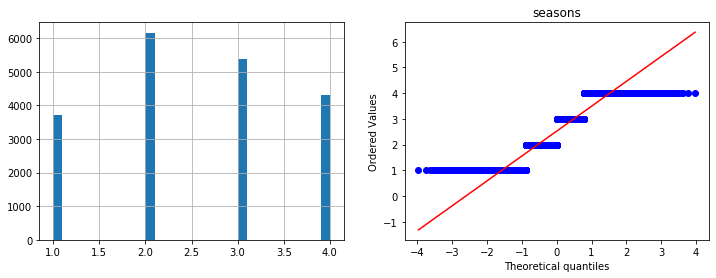

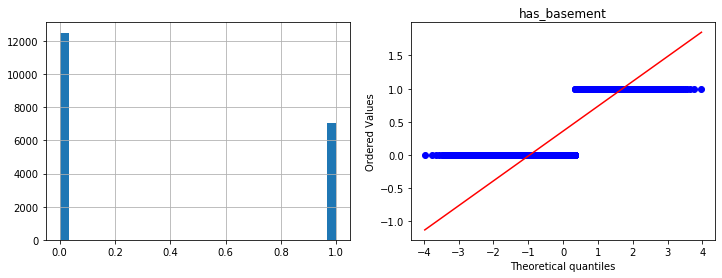

In [99]:
# Function to make vizuals to show normality
def normalityplots (df, column):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    df[column].hist(bins = 30)
    plt.subplot(1,2,2)
    stats.probplot(df[column], dist = 'norm', plot = plt)
    plt.title('{}'.format(column))
    plt.show()

# Now let's see the results of the outlier removal
for column in df2.columns:
    normalityplots(df2, column)

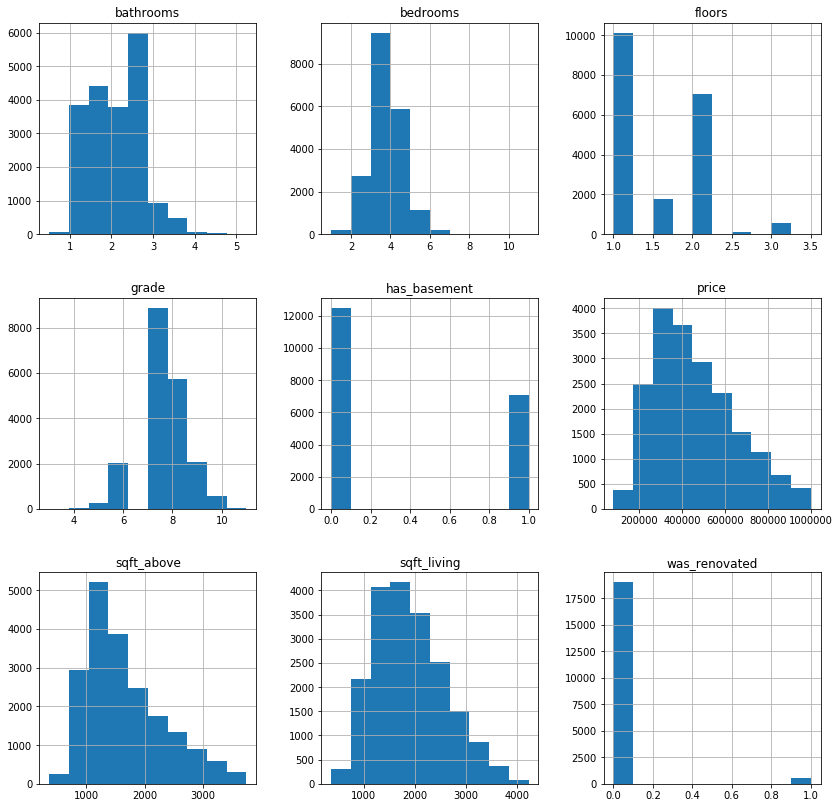

In [100]:
df2.hist(figsize = (14,14));

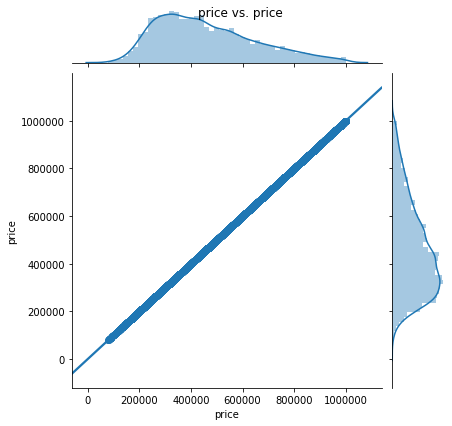

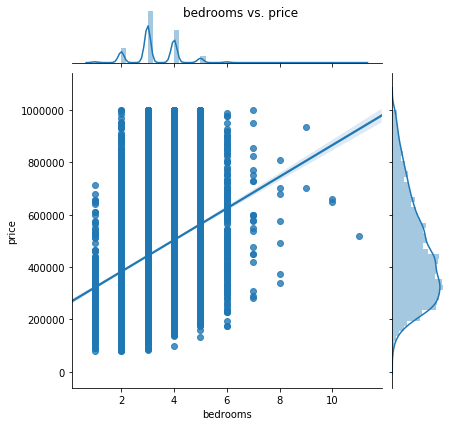

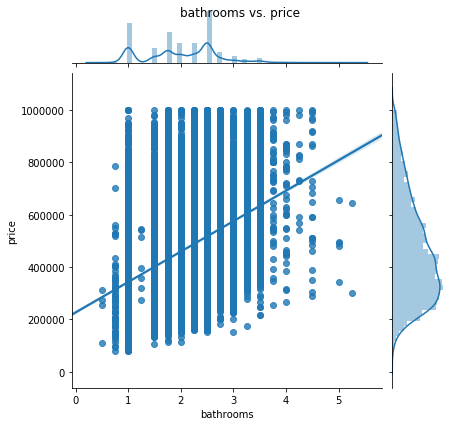

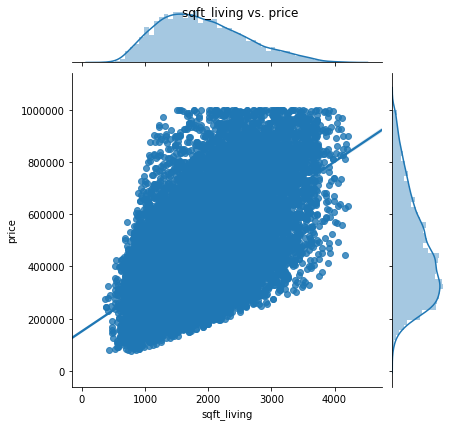

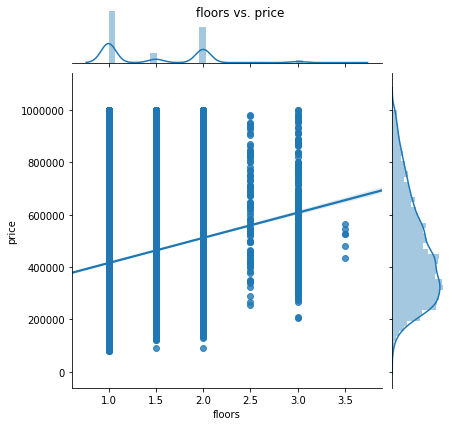

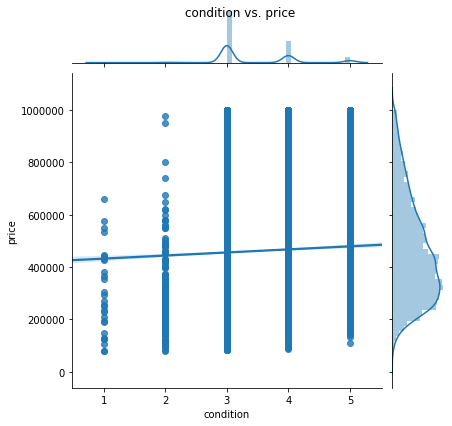

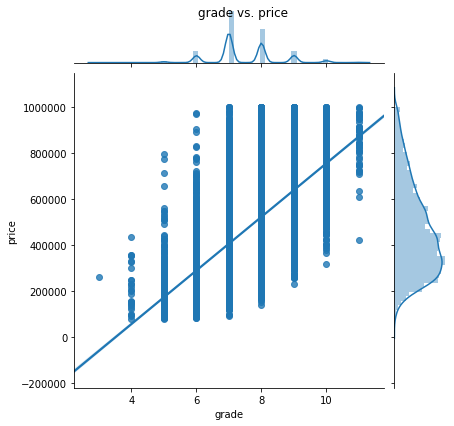

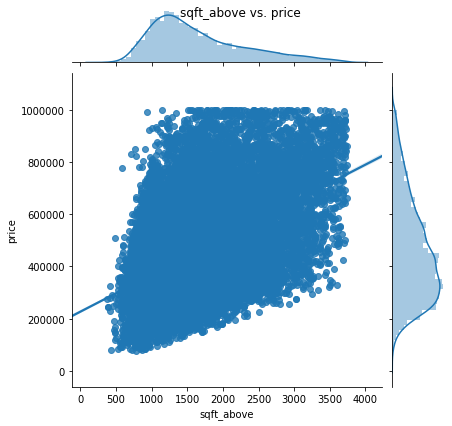

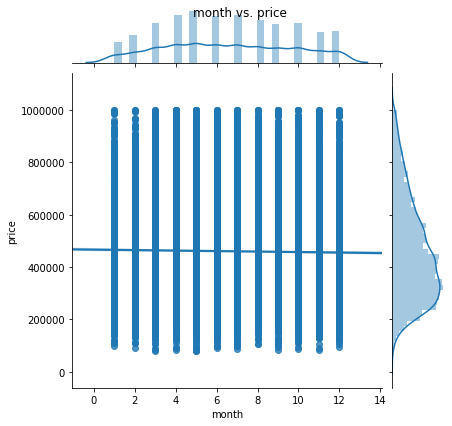

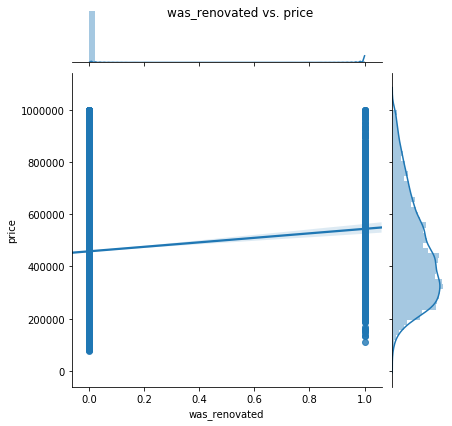

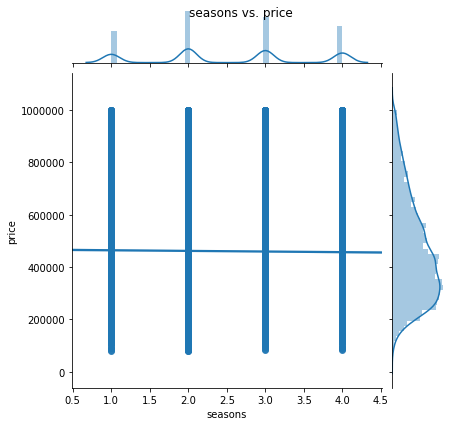

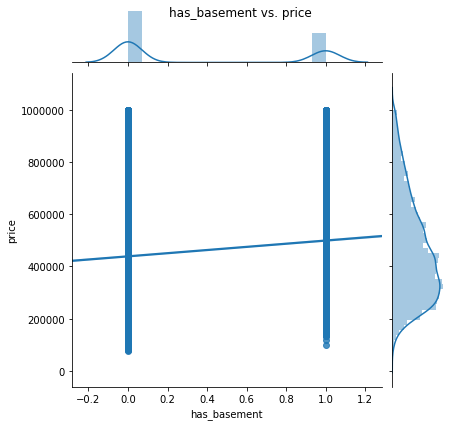

In [101]:
# Creating a function that will create a joint plot to vizualize linearity against our target price
def jointplot(df, col, target = 'price'):
    g = sns.jointplot(data = df, x = col, y = target, kind = 'reg')
    plt.suptitle(f"{col} vs. {target}");
    return g

for col in df2.columns:
    jointplot(df2, col)

Our data and feature columns look a bit more normal now. I will need to drop more columns though before I make a new model as they aren't normally distributed or don't make sense for the model and/or I won't be using it for recommendations of how to improve the house.

### Low p-value Removal

In [102]:
# Function to identify the insignificant p-values
def bad_pvalues(model, verbose=True):
    
#     Pulling out the p-values and identifying the ones above .05
    pvalues = model.pvalues
    bad_features = pvalues[pvalues > .05]
    
#     Excluding the intercept in case it has a high p-value
    if 'Intercept' in bad_features:
        bad_features.remove('Intercept')
        
#      Printing a statement of the bad p-values
    if verbose:
        print(f'{len(bad_features)} bad p-values to be reviewed:\n' 
              + f'{bad_features}')
    return bad_features

In [103]:
model2_bad_pvals = bad_pvalues(model1)

13 bad p-values to be reviewed:
condition[T.3]   0.070
condition[T.4]   0.702
condition[T.5]   0.057
month[T.2]       0.906
month[T.5]       0.688
month[T.6]       0.100
month[T.7]       0.653
month[T.8]       0.994
month[T.9]       0.683
month[T.10]      0.126
month[T.11]      0.733
seasons[T.3]     0.498
seasons[T.4]     0.768
dtype: float64


In [104]:
# We can see from the low values that month has many low p-value features
df3 = df2.copy()
df3.drop(columns=(['month']), inplace=True)
df3.shape

(19580, 11)

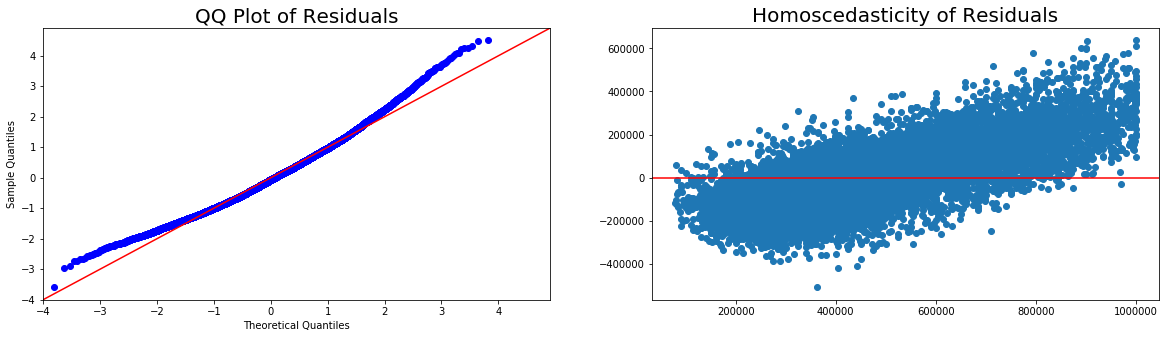

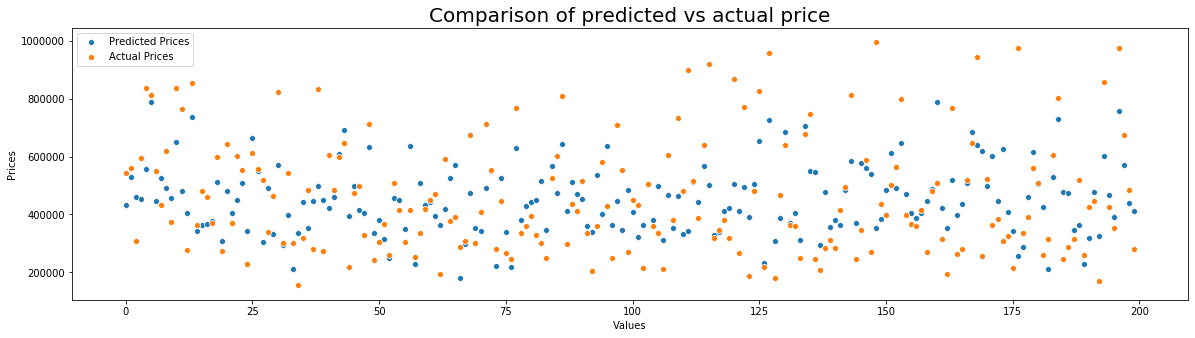

Model test data R2 score: 0.4575377817038374


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     828.4
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:44:36   Log-Likelihood:            -1.9499e+05
No. Observations:               14685   AIC:                         3.900e+05
Df Residuals:                   14669   BIC:                         3.901e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.811e+05    3.1e+04     -9.065      0.000   -3.42e+05    -2.2e+05
C(condition)[T.2] -7.372e+04    3.2e+04     -2.302      0.021   -1.37e+05   -1.09e+04
C(condition)[T.3] -4.963e+04   2.96e+04     -1.675      0.094   -1.08e+05    8448.941
C(condition)[T.4] -1.334e+04   2.97e+04     -0.450      0.653   -7.15e+04    4.48e+04
C(condition)[T.5]  4.897e+04   2.99e+04      1.639      0.101   -9595.571    1.08e+05
C(seasons)[T.2]    5846.6018   3399.639      1.720      0.085    -817.119    1.25e+04
C(seasons)[T.3]   -8324.0038   3497.256     -2.380      0.017   -1.52e+04   -1468.943
C(seasons)[T.4]   -1.148e+04   3654.255     -3.142      0.002   -1.86e+04   -4317.418
bedrooms          -1.219e+04   1747.465     -6.975      0.000   -1.56e+04   -8763.664
bathrooms         -2.739e+04   2730.071    -10.031      0.000   -3.27e+04    -2.2e+04
sqft_living          89.0756      6.465     13.778      0.000      76.403     101.748
floors             2.521e+04   3002.313      8.396      0.000    1.93e+04    3.11e+04
grade              8.375e+04   1807.294     46.340      0.000    8.02e+04    8.73e+04
sqft_above           11.0010      6.864      1.603      0.109      -2.454      24.456
was_renovated      1.025e+05   6820.958     15.030      0.000    8.92e+04    1.16e+05
has_basement        5.49e+04   4716.773     11.640      0.000    4.57e+04    6.41e+04
==============================================================================
Omnibus:                      584.014   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.049
Skew:                           0.489   Prob(JB):                    1.05e-144
Kurtosis:                       3.355   Cond. No.                     1.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# Model summary to see the changes if significant
functionmodel3 = model_fun(df3)

### Multicolinearity Column/Feature Removal

In [106]:
# Creating a heat map again to see our new data
corr3 = df3.iloc[:,2:] 
corr3.corr().abs().style.background_gradient(cmap='Reds')

In [107]:
# There is a high correlation betweeon sqft_above and sqft_living15
# Note even sure what sqftliving15 is exactly so we will be dropping this column

In [108]:
df4 = df3.copy()
df4= df4.drop(columns=['sqft_living'])

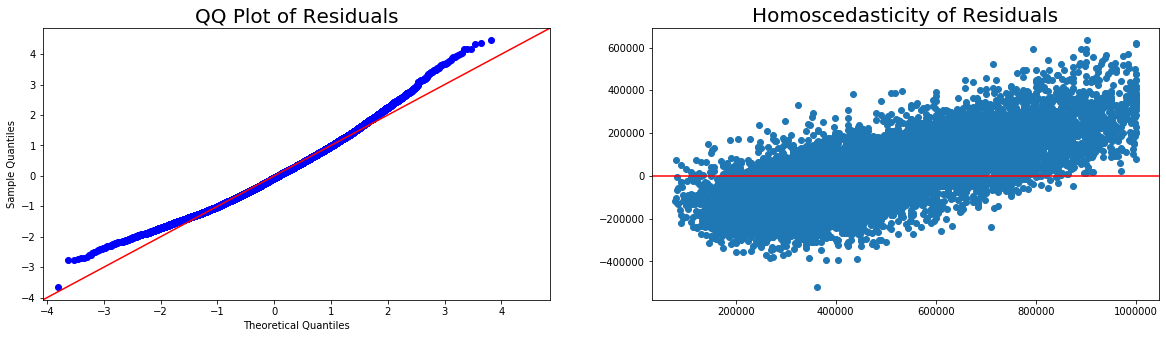

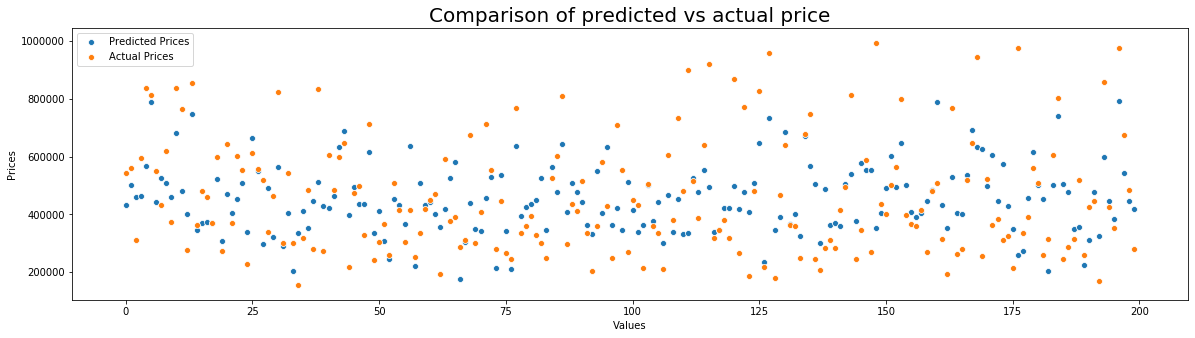

Model test data R2 score: 0.44634968288406085


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     862.9
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:44:38   Log-Likelihood:            -1.9508e+05
No. Observations:               14685   AIC:                         3.902e+05
Df Residuals:                   14670   BIC:                         3.903e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.968e+05   3.12e+04     -9.518      0.000   -3.58e+05   -2.36e+05
C(condition)[T.2]  -8.33e+04   3.22e+04     -2.585      0.010   -1.46e+05   -2.01e+04
C(condition)[T.3] -5.723e+04   2.98e+04     -1.919      0.055   -1.16e+05    1217.414
C(condition)[T.4] -1.818e+04   2.98e+04     -0.609      0.542   -7.67e+04    4.03e+04
C(condition)[T.5]  4.719e+04   3.01e+04      1.569      0.117   -1.17e+04    1.06e+05
C(seasons)[T.2]    6786.0337   3420.761      1.984      0.047      80.912    1.35e+04
C(seasons)[T.3]   -7817.2727   3519.497     -2.221      0.026   -1.47e+04    -918.616
C(seasons)[T.4]   -1.057e+04   3677.092     -2.874      0.004   -1.78e+04   -3358.816
bedrooms          -6669.5507   1711.840     -3.896      0.000      -1e+04   -3314.129
bathrooms         -1.996e+04   2693.454     -7.409      0.000   -2.52e+04   -1.47e+04
floors             1.555e+04   2938.106      5.293      0.000    9793.120    2.13e+04
grade              8.588e+04   1812.197     47.392      0.000    8.23e+04    8.94e+04
sqft_above           94.2847      3.273     28.804      0.000      87.869     100.701
was_renovated      1.056e+05   6861.121     15.386      0.000    9.21e+04    1.19e+05
has_basement       1.041e+05   3102.989     33.543      0.000     9.8e+04     1.1e+05
==============================================================================
Omnibus:                      583.964   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.678
Skew:                           0.493   Prob(JB):                    3.43e-144
Kurtosis:                       3.329   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# Model to see difference
functionmodel4 = model_fun(df4)

In [110]:
df4.describe()

price  bedrooms  bathrooms  ...  sqft_above  was_renovated  has_basement
count   19580.000 19580.000  19580.000  ...   19580.000      19580.000     19580.000
mean   460365.636     3.291      2.012  ...    1660.025          0.030         0.361
std    191363.837     0.863      0.681  ...     667.119          0.170         0.480
min     78000.000     1.000      0.500  ...     370.000          0.000         0.000
25%    310000.000     3.000      1.500  ...    1160.000          0.000         0.000
50%    427500.000     3.000      2.000  ...    1490.000          0.000         0.000
75%    580000.000     4.000      2.500  ...    2050.000          0.000         1.000
max   1000000.000    11.000      5.250  ...    3740.000          1.000         1.000

[8 rows x 8 columns]

# 3. Will multicollinearity affect what feature yields the highest selling price?

Notes: This didn't create too much change. Also to note the warning message at the bottom of the screen is still appearing.

# 1. What outlier removal method is the most effective?

In trying multiple outlier removal methods above and not included in our notebook we found that the most effective outlier removal system was IQR outlier removal. 

Other methods tried that are not included on the notebook and can be found in the "leftovers" notebook:

*Log Transformation

*One Hot Encoding

# 2. What effect does outliers have on our outcomes and overall data?

Above we have created a training model to see the difference that outlier removal had on our data. 

The QQ plot and Homodescacidisity plot show that there was improvement in our residuals

# Recommendations

Homeowners are able to control the following variables/features of their house. My improving or increasing these features the homeowners can possibly increase the worth of their home when selling.

In [111]:
functionmodel3.params

Intercept           -281064.729
C(condition)[T.2]    -73722.955
C(condition)[T.3]    -49633.387
C(condition)[T.4]    -13336.491
C(condition)[T.5]     48966.381
C(seasons)[T.2]        5846.602
C(seasons)[T.3]       -8324.004
C(seasons)[T.4]      -11480.216
bedrooms             -12188.915
bathrooms            -27386.432
sqft_living              89.076
floors                25207.685
grade                 83749.395
sqft_above               11.001
was_renovated        102521.121
has_basement          54903.101
dtype: float64

In [112]:
# Convert the coefficient series to a sorted dataframe

coeffs_df = functionmodel3.params.to_frame()
coeffs_df.columns = ['coefficients']
coeffs_df = coeffs_df.sort_values('coefficients', ascending = False)
coeffs_df.style.background_gradient(cmap = 'Reds').set_caption('Coefficients')

In [113]:
coeffs_df = coeffs_df.transpose()
coeffs_df

was_renovated     grade  ...  C(condition)[T.2]   Intercept
coefficients     102521.121 83749.395  ...         -73722.955 -281064.729

[1 rows x 16 columns]

In [114]:
def multicol_plot(df):
    
#   Creating a temporary new dataframe
    new_df = df.copy()
    
#   Converting the category types to int so they will show up in the heatmap
    categories = new_df.select_dtypes('category')
    for col in categories:
        new_df[col]= new_df[col].astype('int64')  
        
#   Generating the correlation chart 
    corr = abs(new_df.corr())
    
#   Creating a mask that will eliminate redundant values in the heatmap
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
#   Plotting the figure and applying the mask
    fig = plt.figure()
    fig.set_size_inches(12,12)
    sns.heatmap(corr, annot=True, mask=mask)
    plt.show();
    
    display(corr)
    return corr

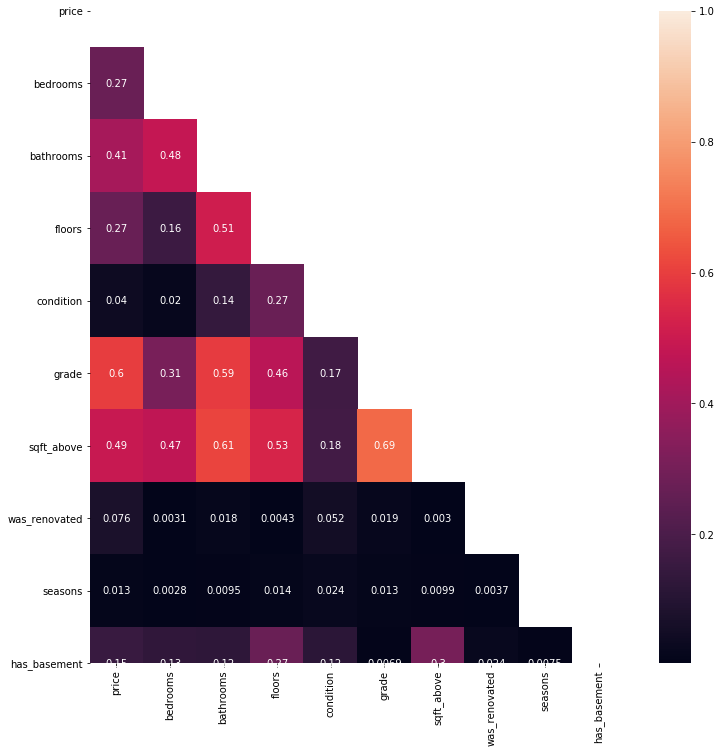

price  bedrooms  bathrooms  ...  was_renovated  seasons  has_basement
price          1.000     0.272      0.413  ...          0.076    0.013         0.152
bedrooms       0.272     1.000      0.484  ...          0.003    0.003         0.130
bathrooms      0.413     0.484      1.000  ...          0.018    0.009         0.124
floors         0.269     0.161      0.512  ...          0.004    0.014         0.275
condition      0.040     0.020      0.139  ...          0.052    0.024         0.119
grade          0.599     0.307      0.593  ...          0.019    0.013         0.007
sqft_above     0.490     0.474      0.614  ...          0.003    0.010         0.303
was_renovated  0.076     0.003      0.018  ...          1.000    0.004         0.024
seasons        0.013     0.003      0.009  ...          0.004    1.000         0.008
has_basement   0.152     0.130      0.124  ...          0.024    0.008         1.000

[10 rows x 10 columns]

In [115]:
df4_corr = multicol_plot(df4)

# 4. What features of a house yield make the house sell at a higher price?
As we can see from the above Coefficient Mapping tool we can see that renovation, condition, and grade had the highest impact on yielding a higher selling price.




### Improve the Grade of the House

1-3 - Falls short of minimum building standards. Normally cabin or inferior structure.

4 - Generally older, low quality construction. Does not meet code.

5 - Low construction costs and workmanship. Small, simple design.

6 - Lowest grade currently meeting building code. Low quality materials and simple designs.

7 - Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 - Better architectural design with extra interior and exterior design and quality.

10 - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 - Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 - Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 - Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

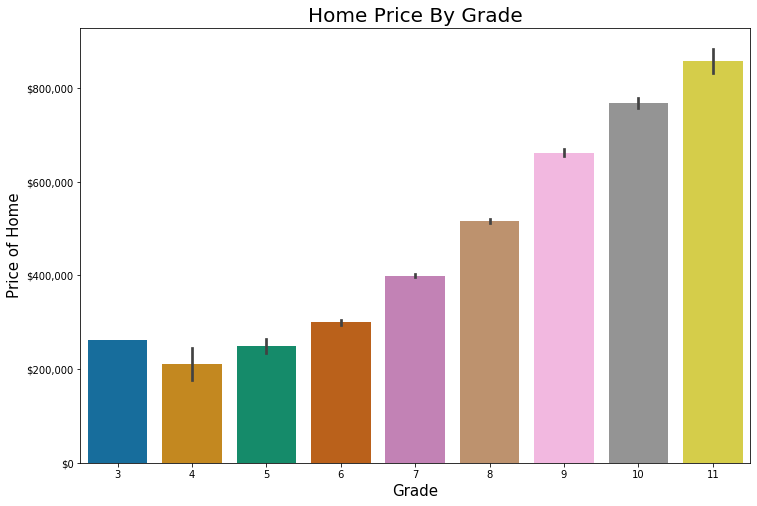

In [116]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='grade', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Grade', fontsize=15)
ax.set_ylabel('Price of Home', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

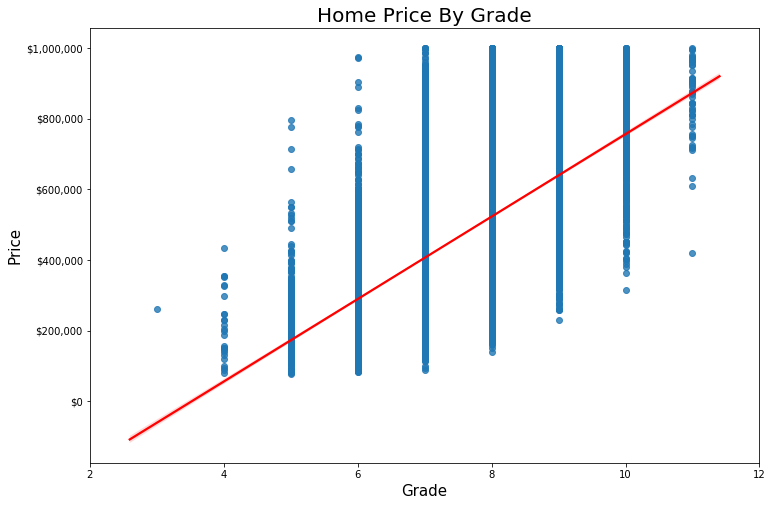

In [117]:
# Regplot

fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['grade'], df4['price'], line_kws={'color':'red'})
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)
ax.set(xlim=(2, 12))
ax.set_xlabel('Grade', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

### Increase the Number of Bedrooms

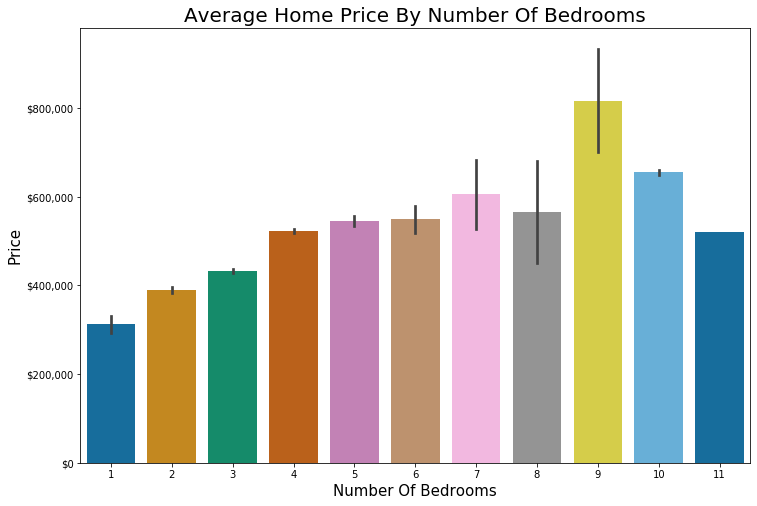

In [118]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='bedrooms', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Number Of Bedrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number Of Bedrooms', fontsize=20);

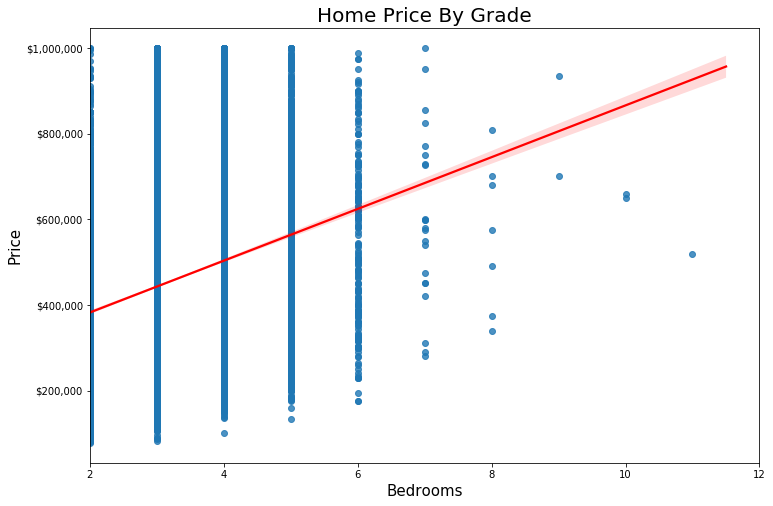

In [119]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['bedrooms'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Bedrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

### Increase the Number of Bathrooms

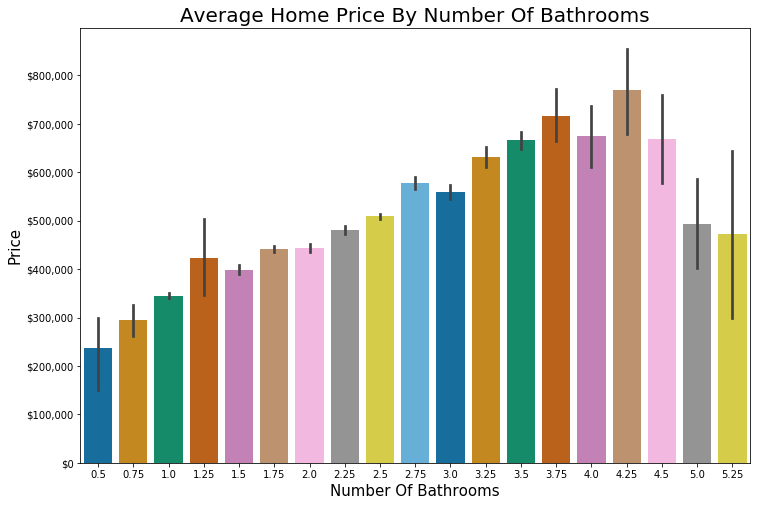

In [120]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='bathrooms', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Number Of Bathrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number Of Bathrooms', fontsize=20);

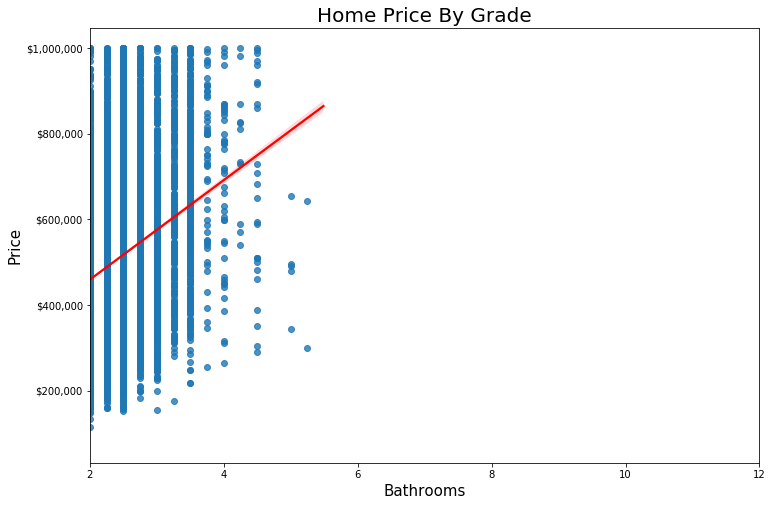

In [121]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['bathrooms'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Bathrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

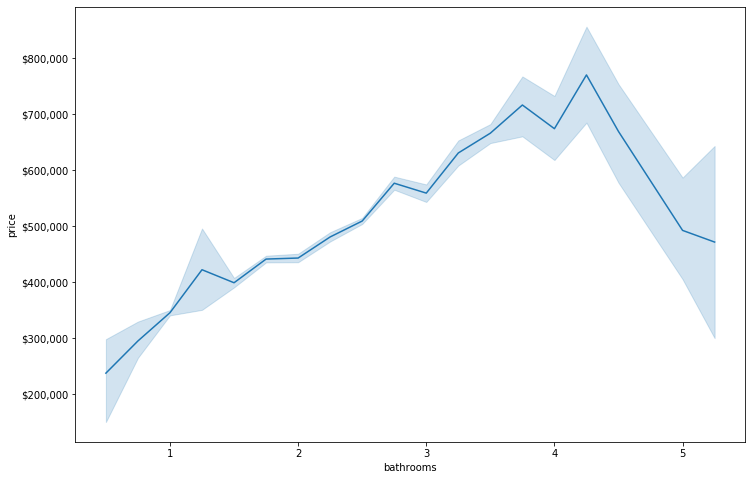

In [122]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['bathrooms'], df4['price'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

### Square Footage of Upper Floors

In [123]:
df4.head()

price  bedrooms  bathrooms  ...  was_renovated seasons  has_basement
0 221900.000         3      1.000  ...              0       4             0
1 538000.000         3      2.250  ...              1       4             1
2 180000.000         2      1.000  ...              0       1             0
3 604000.000         4      3.000  ...              0       4             1
4 510000.000         3      2.000  ...              0       1             0

[5 rows x 10 columns]

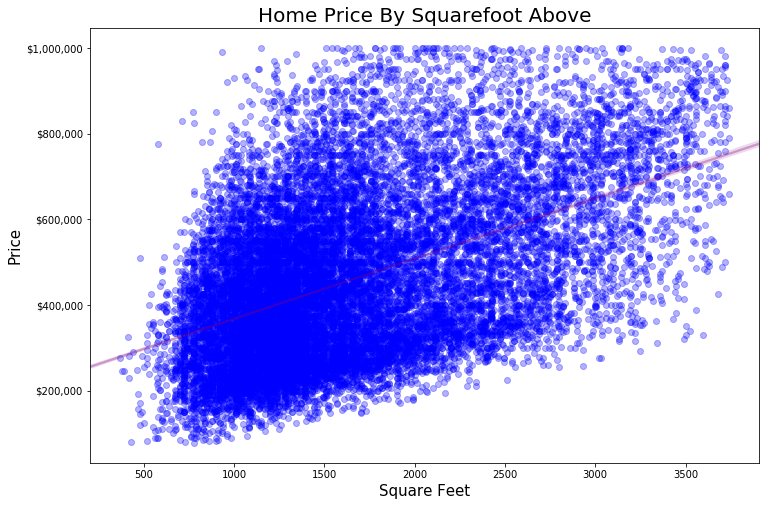

In [124]:
# Regplot for sqft

fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['sqft_above'], df4['price'], 
            scatter_kws = {'color': 'blue', 'alpha': 0.3}, 
            line_kws = {'color': 'purple', 'alpha': 0.3})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Square Feet', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Squarefoot Above', fontsize=20);

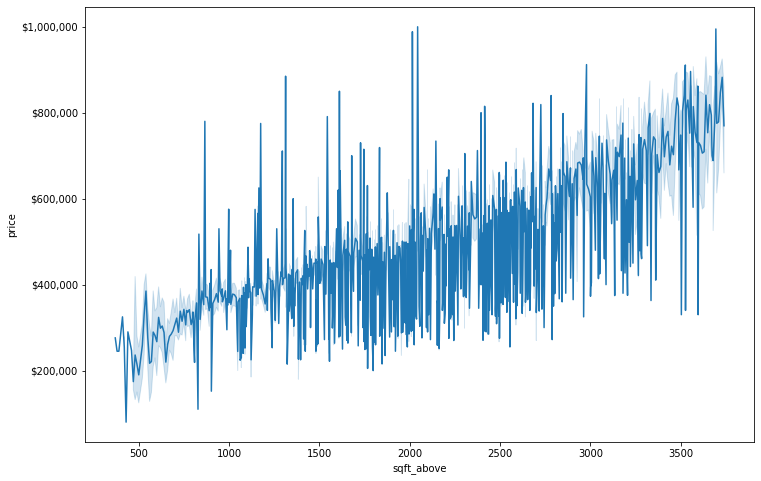

In [125]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['sqft_above'], df4['price'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)


Recommendations:
    

### Improve the Condition of the House

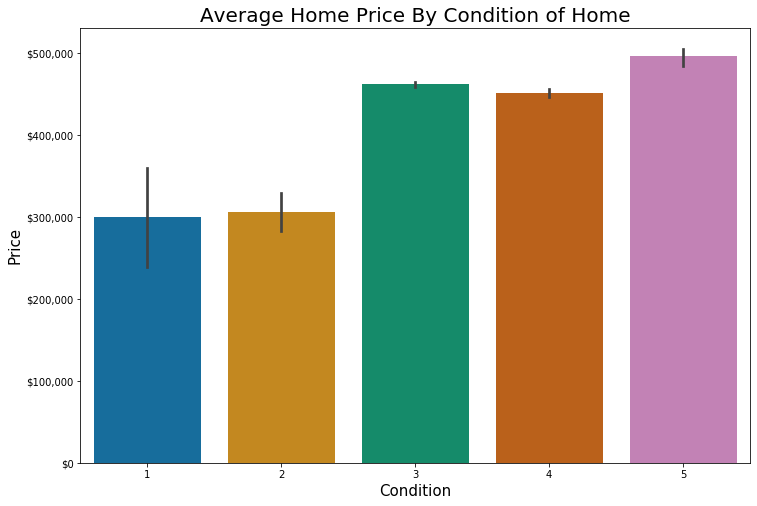

In [126]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='condition', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Condition', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Condition of Home', fontsize=20);

### Add a Floor to the Home

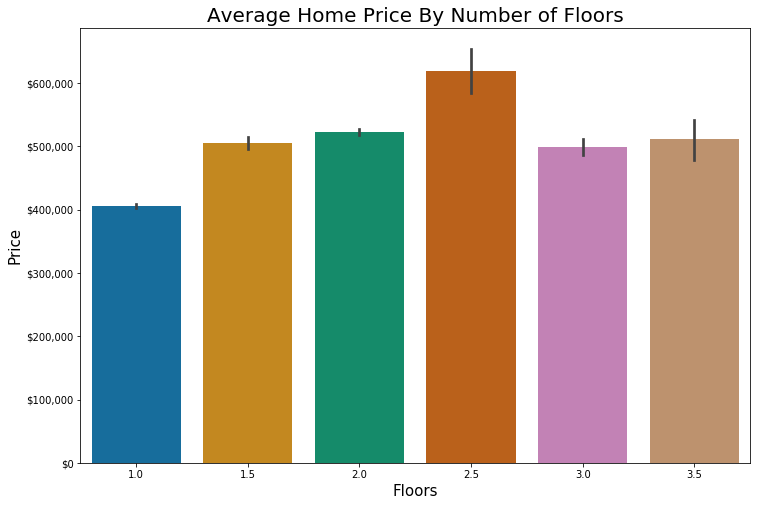

In [127]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='floors', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Floors', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number of Floors', fontsize=20);

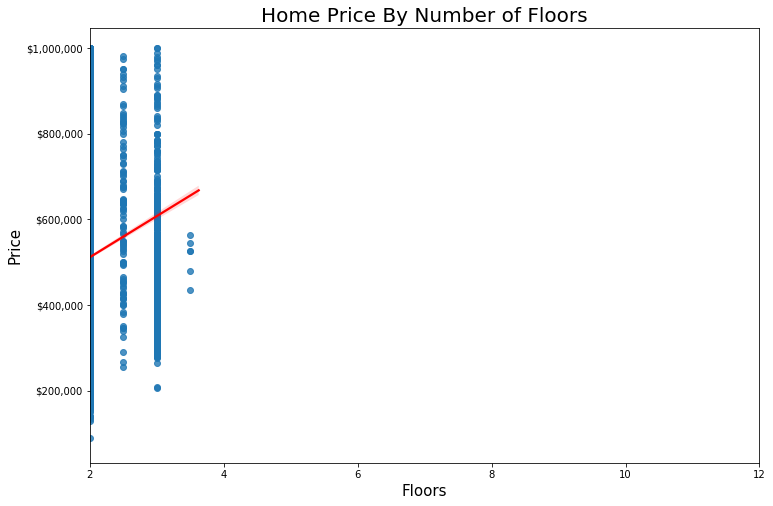

In [128]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['floors'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Floors', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Number of Floors', fontsize=20);

# Tableau Map

# Future Work

1. With more time given, I would also like to utilize the latitude and longitude given in this dataset to make a Tableau map.
2. I would additionally experiment more with different outlier removals including Cooks Distance.
3. In closing, to improve the r2 score of this model that is currently low, I would better fit the model by checking for overfitting.